# Compare classification models

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [2]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [3]:
df1 = load_experiment_sessions('MoNA', 'clf_nextron', [
    'experiment01_pfi.csv', 'experiment02_pfi.csv', 'experiment03_pfi.csv', 'experiment04_pfi.csv'])

df2 = load_experiment_sessions('HMDB', 'clf_nextron', [
    'experiment01_pfi.csv', 'experiment02_pfi.csv'])

df = pd.concat([df1, df2], ignore_index=True)
df

,name,target_column,target_column_id,dataset,full_model_name,layer_config,input_columns,class_subset,param_n_classes,param_dropout,...,m_valid_recall_score_macro,m_valid_precision_score_macro,m_valid_f1_score_macro,m_test_loss,m_test_accuracy_score,m_test_balanced_accuracy_score,m_test_recall_score_macro,m_test_precision_score_macro,m_test_f1_score_macro,feature_importance
0,clf,ionization_mode,ionization_mode_id,MoNA,clf_741-494-185-1_01 (04-12-2021_14-11-37),"[741, 494, 185]","['spectrum', 'collision_energy', 'total_exact_...",[],2,0.0,...,0.977517,0.977324,0.977170,0.111487,0.955842,0.955742,0.955742,0.957767,0.955391,"{'spectrum': -0.004149170165966531, 'instrumen..."
1,clf,ionization_mode,ionization_mode_id,MoNA,clf_741-494-185-1_01 (04-12-2021_14-30-21),"[741, 494, 185]","['spectrum', 'collision_energy', 'total_exact_...",[],2,0.0,...,0.960679,0.962511,0.960699,0.068274,0.967986,0.968284,0.968284,0.969047,0.967754,"{'instrument_type_id': -0.009808038392321151, ..."
2,clf,ionization_mode,ionization_mode_id,MoNA,clf_741-494-185-1_01 (04-12-2021_14-49-51),"[741, 494, 185]","['spectrum', 'collision_energy', 'total_exact_...",[],2,0.0,...,0.941955,0.943256,0.940681,0.179670,0.945907,0.945740,0.945740,0.947354,0.945480,"{'superclass_id': -0.0007998400319937705, 'col..."
3,clf,ionization_mode,ionization_mode_id,MoNA,clf_741-494-185-1_01 (04-12-2021_15-08-44),"[741, 494, 185]","['spectrum', 'collision_energy', 'total_exact_...",[],2,0.0,...,0.976897,0.977100,0.976781,0.100512,0.955078,0.955201,0.955201,0.957496,0.954687,"{'instrument_type_id': -0.010637872425514606, ..."
4,clf,ionization_mode,ionization_mode_id,MoNA,clf_741-494-185-1_01 (04-12-2021_15-29-16),"[741, 494, 185]","['spectrum', 'collision_energy', 'total_exact_...",[],2,0.0,...,0.976761,0.977281,0.976755,0.182116,0.949474,0.949405,0.949405,0.952707,0.948990,"{'instrument_type_id': -0.0019396120775847735,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,clf,class,class_id,HMDB,clf_127-84-31-9_02 (06-12-2021_13-10-26),"[127, 84, 31]","['spectrum', 'collision_energy', 'ionization_m...","[87, 88, 179, 78, 159, 48, 80, 209, 23]",9,0.0,...,0.541940,0.540361,0.536094,0.924764,0.561719,0.553742,0.553742,0.552595,0.547217,"{'spectrum': -0.07267156862745072, 'collision_..."
600,clf,class,class_id,HMDB,clf_127-84-31-9_02 (06-12-2021_13-17-07),"[127, 84, 31]","['spectrum', 'collision_energy', 'ionization_m...","[87, 88, 179, 78, 159, 48, 80, 209, 23]",9,0.0,...,0.565464,0.570642,0.560313,0.907165,0.568750,0.572235,0.572235,0.557117,0.551134,"{'ionization_mode_id': -0.008210784313725461, ..."
601,clf,class,class_id,HMDB,clf_127-84-31-9_02 (06-12-2021_13-23-49),"[127, 84, 31]","['spectrum', 'collision_energy', 'ionization_m...","[87, 88, 179, 78, 159, 48, 80, 209, 23]",9,0.0,...,0.554625,0.547609,0.527768,0.896245,0.592578,0.583482,0.583482,0.556696,0.545197,"{'kingdom_id': 0.0, 'ionization_mode_id': 0.00..."
602,clf,class,class_id,HMDB,clf_127-84-31-9_02 (06-12-2021_13-30-40),"[127, 84, 31]","['spectrum', 'collision_energy', 'ionization_m...","[87, 88, 179, 78, 159, 48, 80, 209, 23]",9,0.0,...,0.569845,0.606177,0.554160,0.936950,0.524219,0.531649,0.531649,0.552278,0.524840,"{'spectrum': -0.20698529411764638, 'collision_..."


In [4]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

## Scores vs. number of peaks

In [5]:
clf_scores = ['m_train_accuracy_score', 'm_train_balanced_accuracy_score', 'm_train_recall_score_macro', 'm_train_precision_score_macro', 'm_train_f1_score_macro']

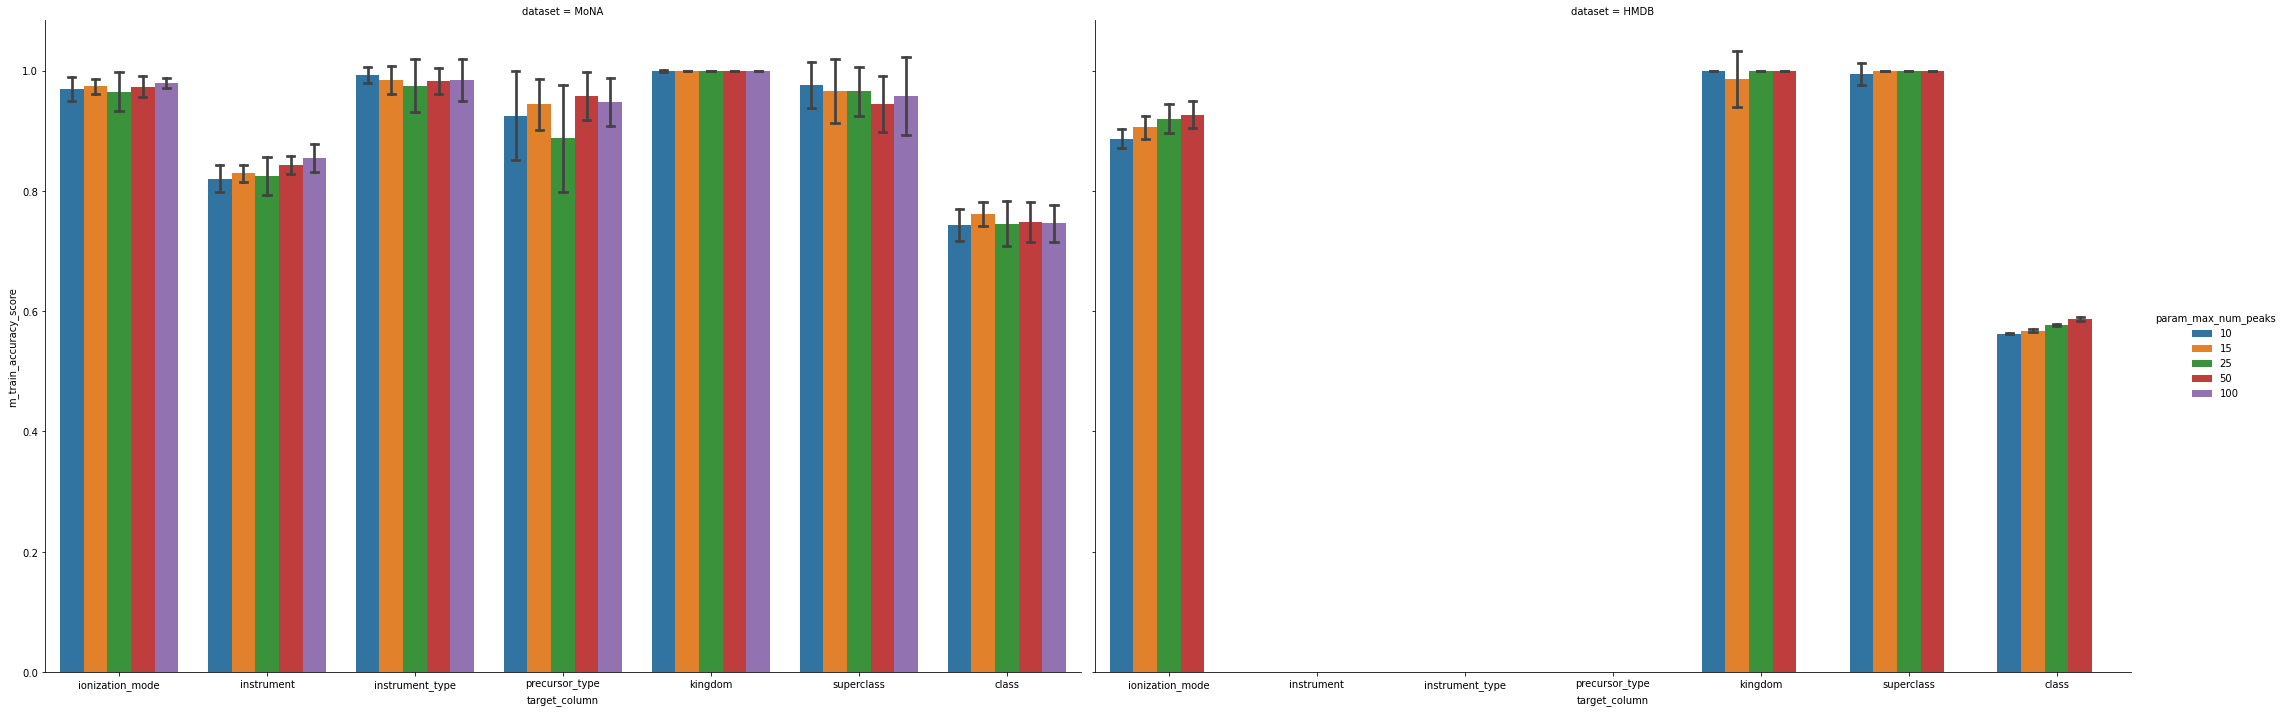

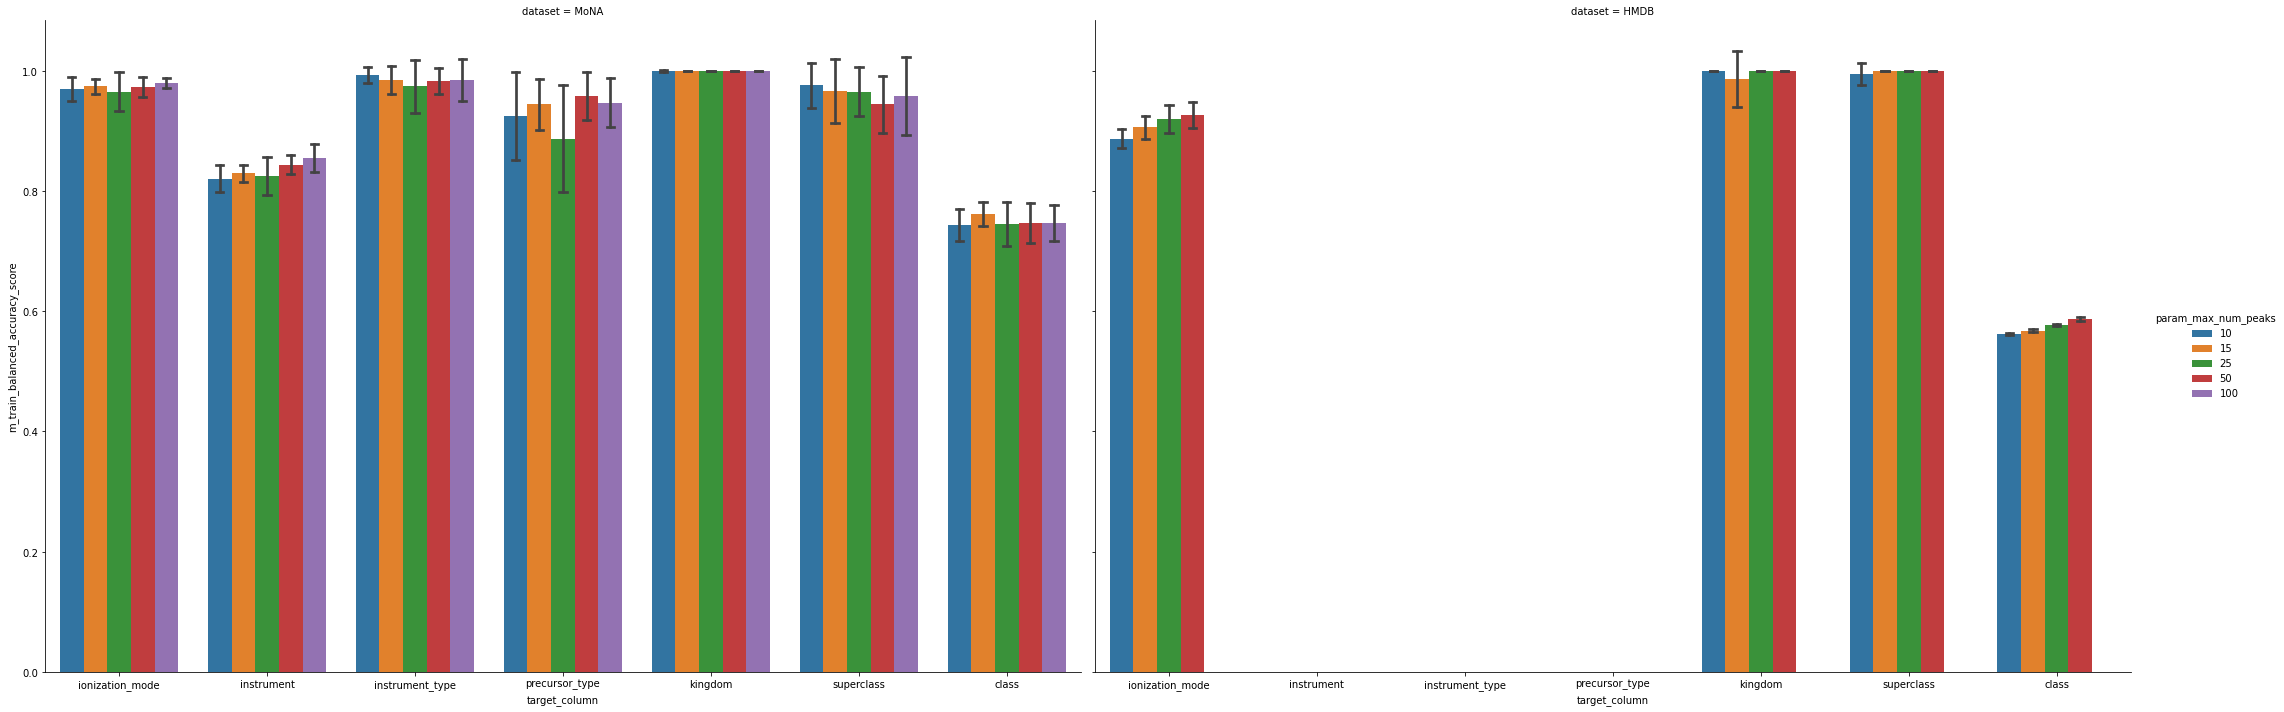

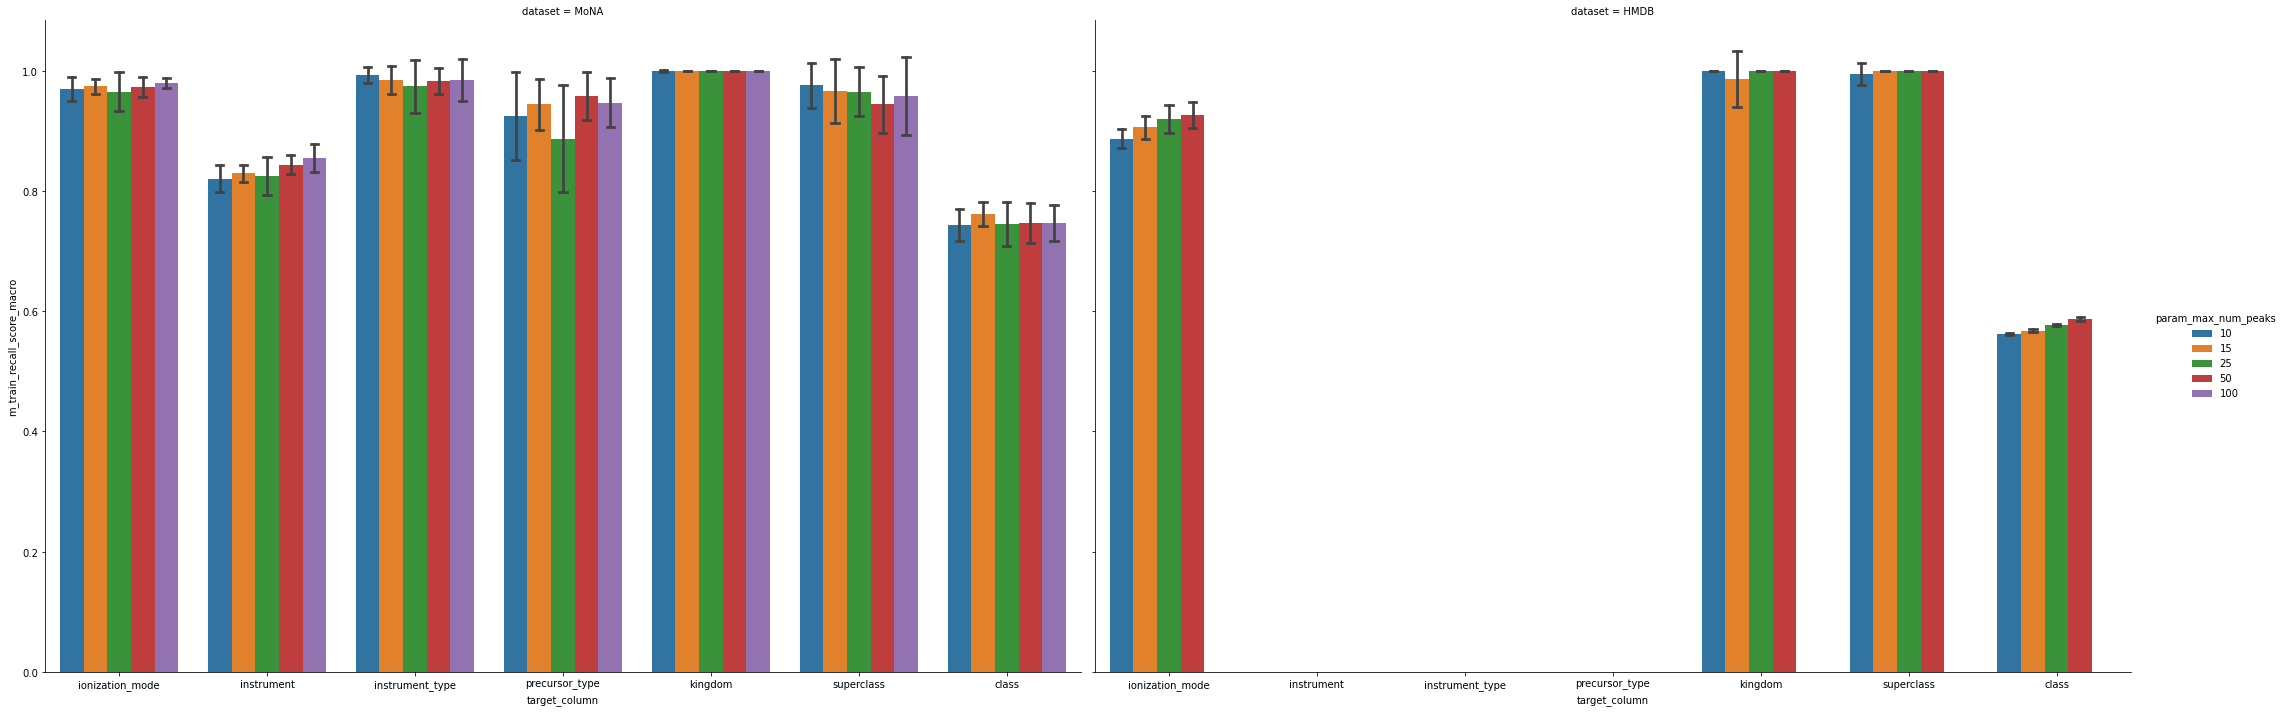

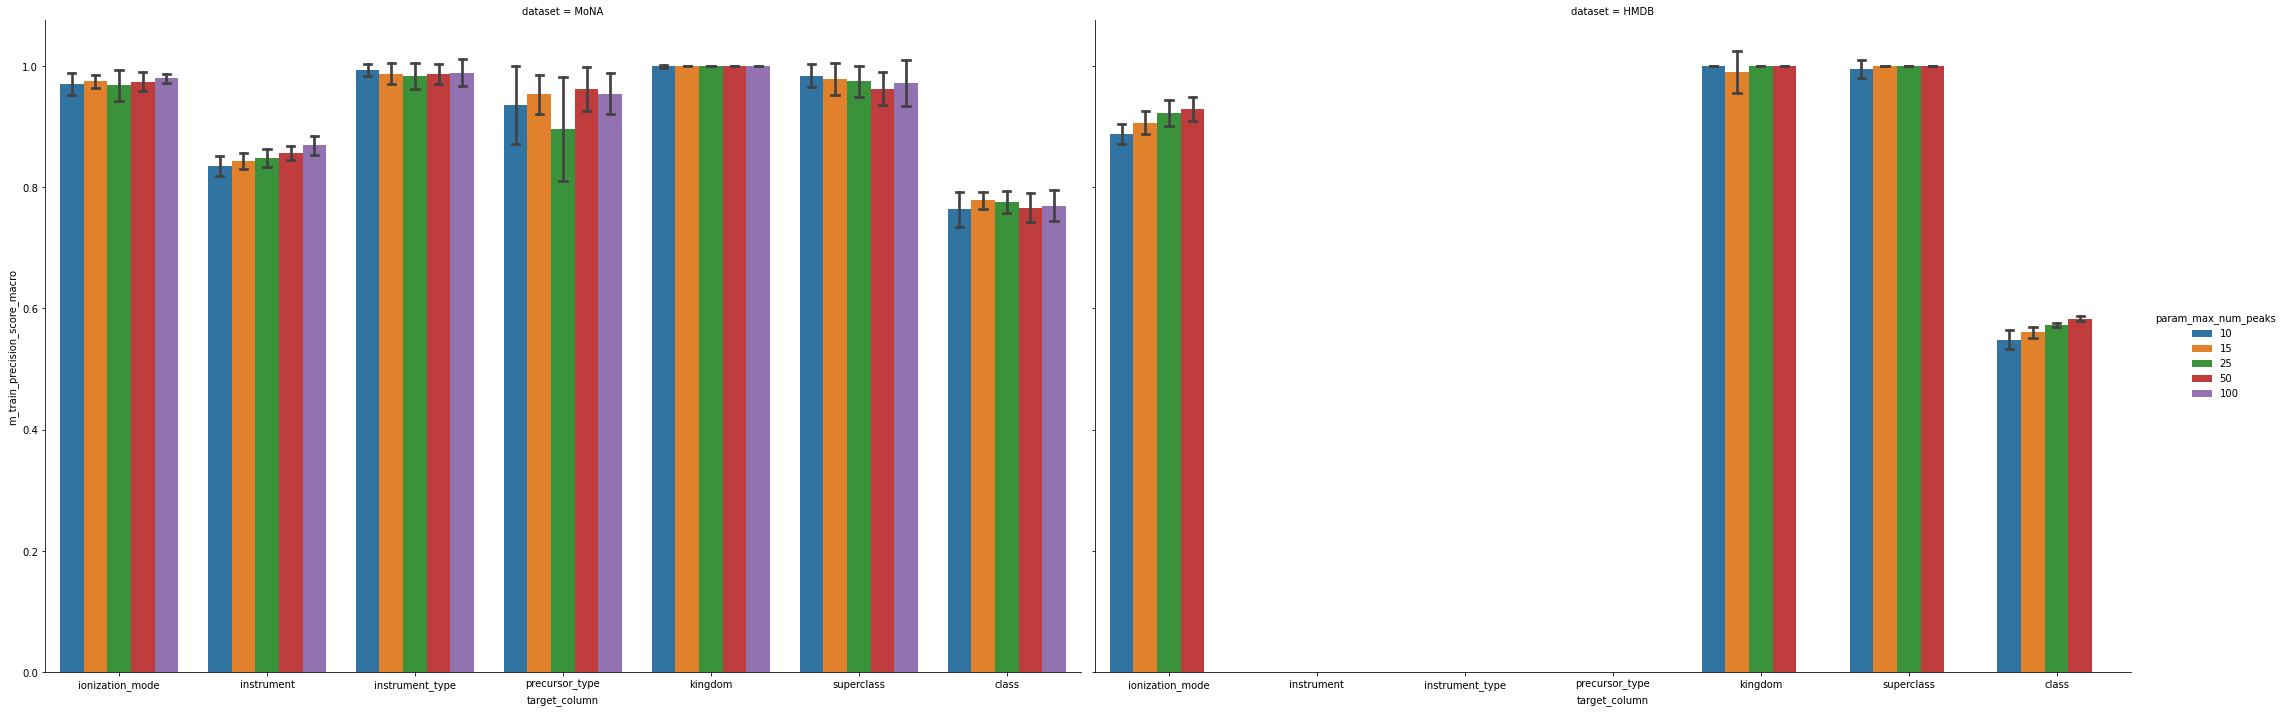

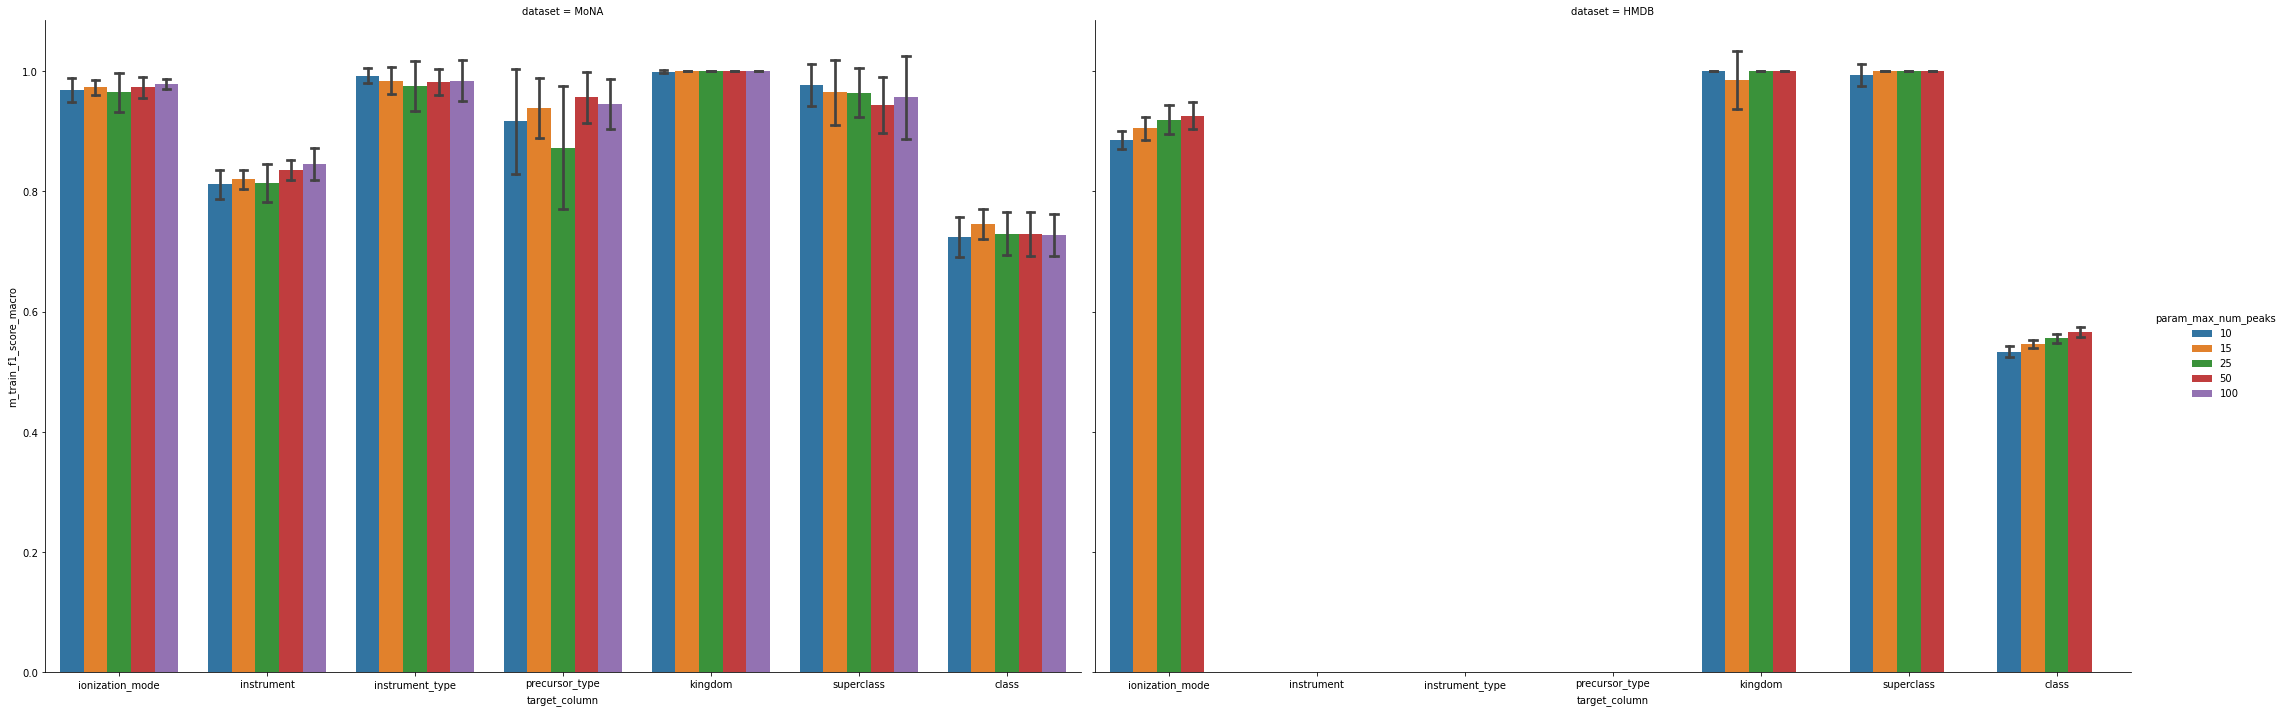

In [6]:
for column in clf_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_max_num_peaks", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Scores vs. minimum intensity

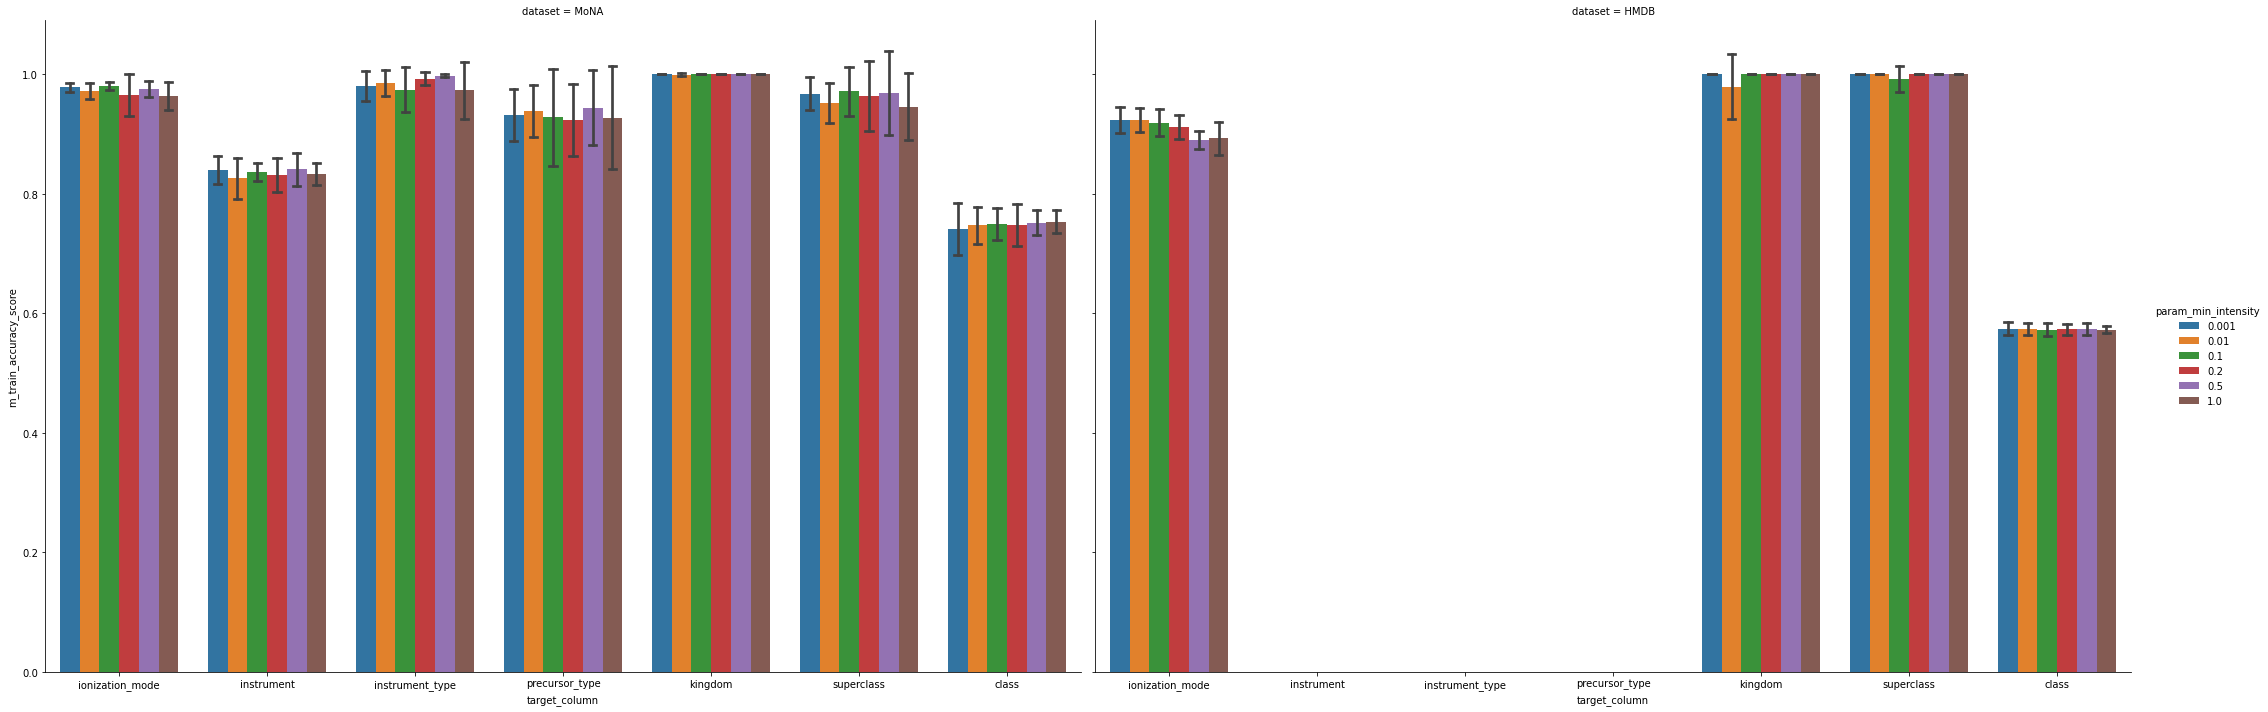

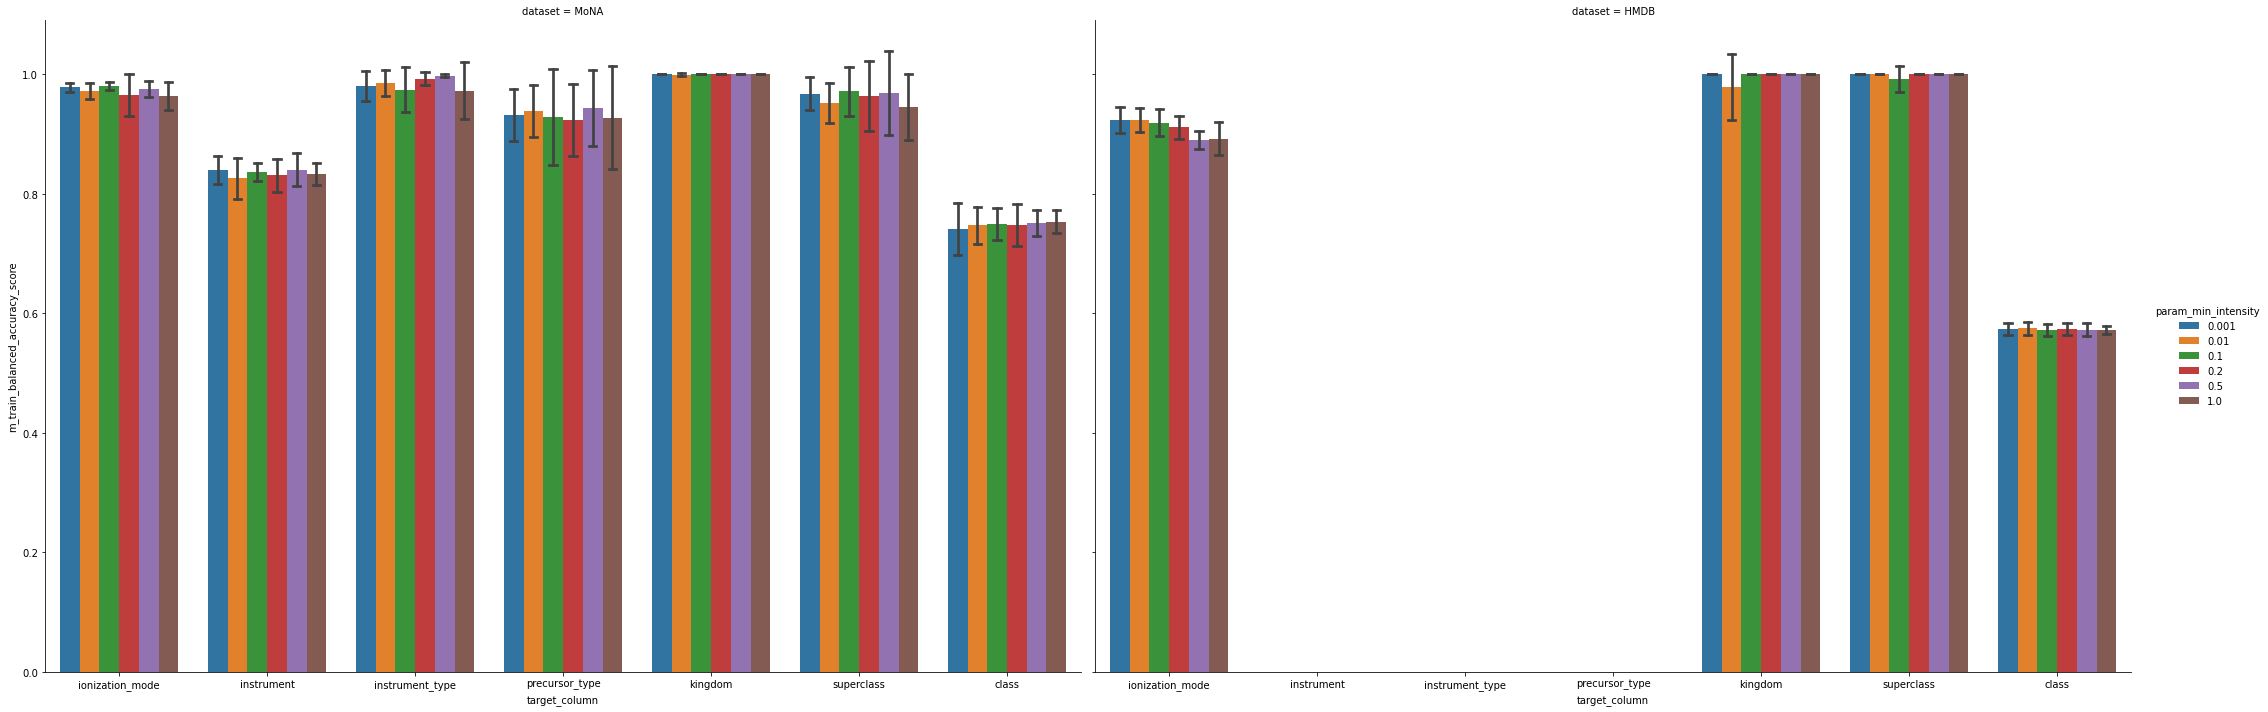

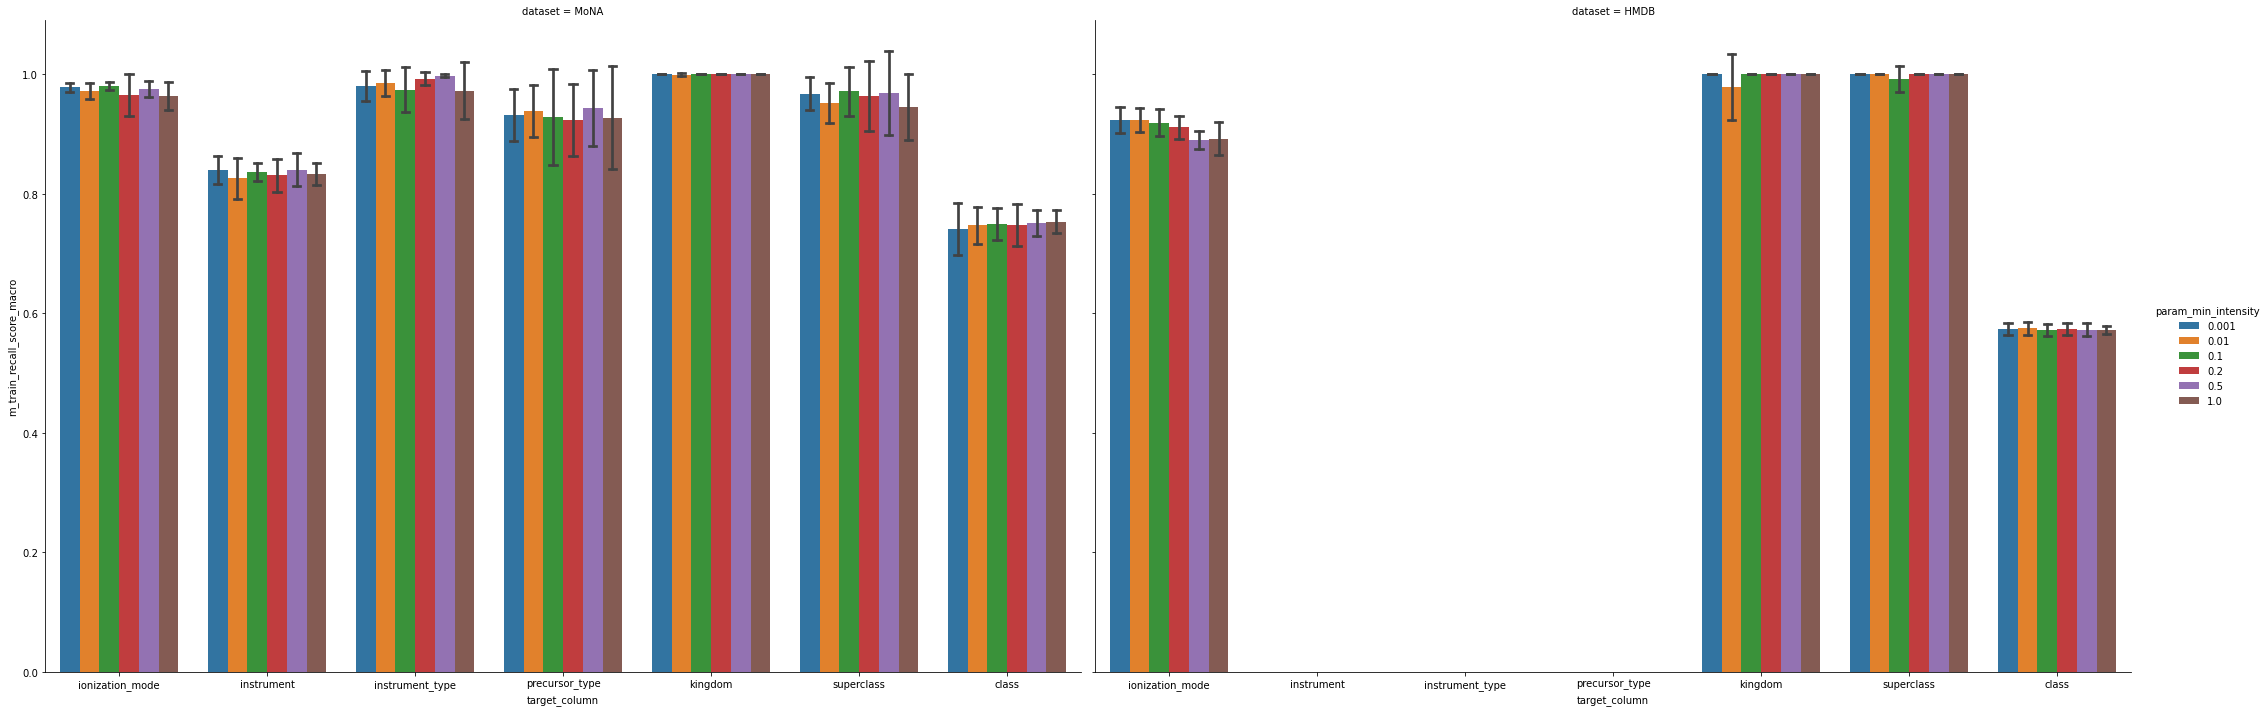

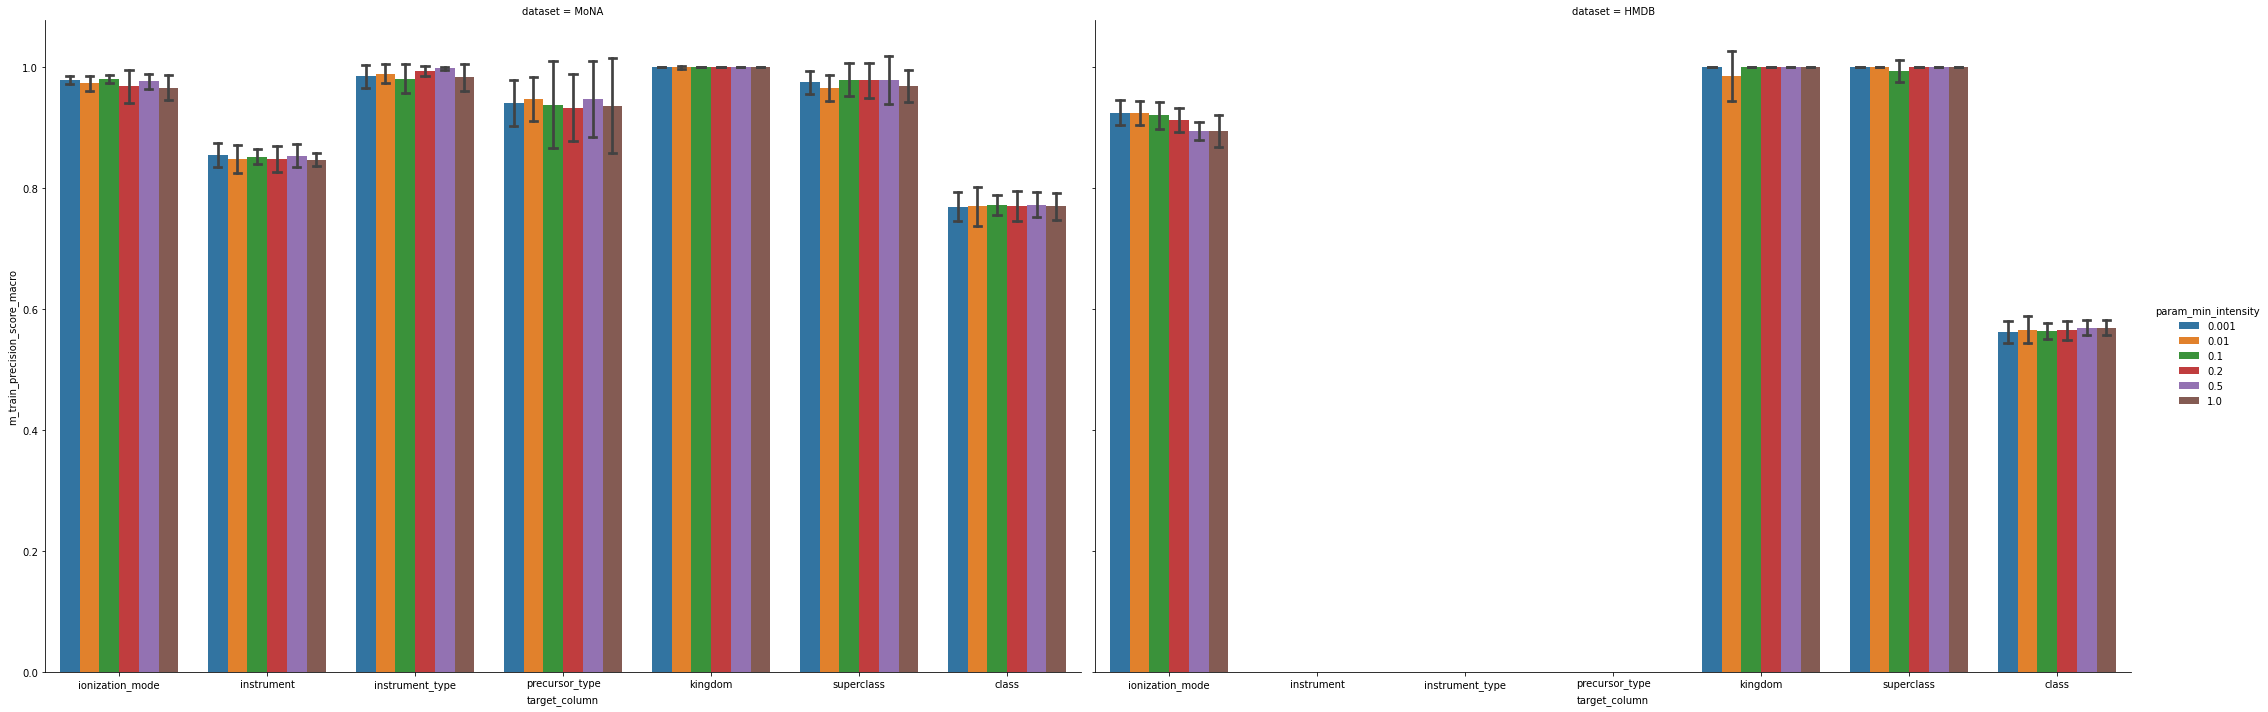

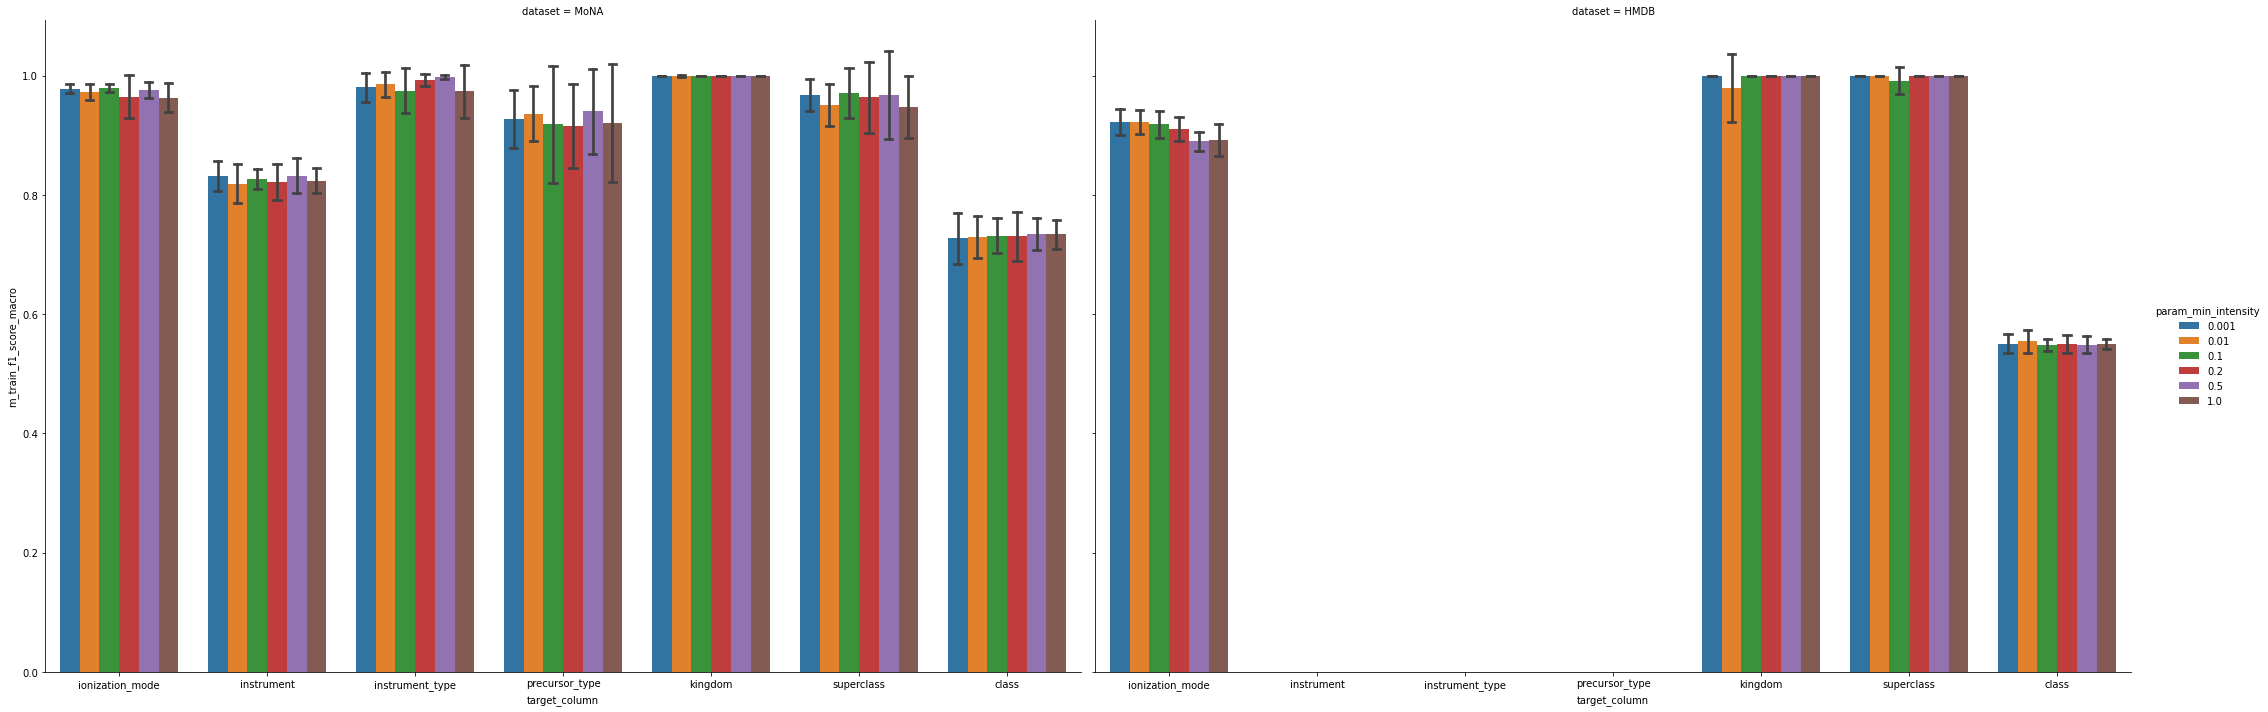

In [7]:
for column in clf_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_min_intensity", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Scores vs. rescale intensity

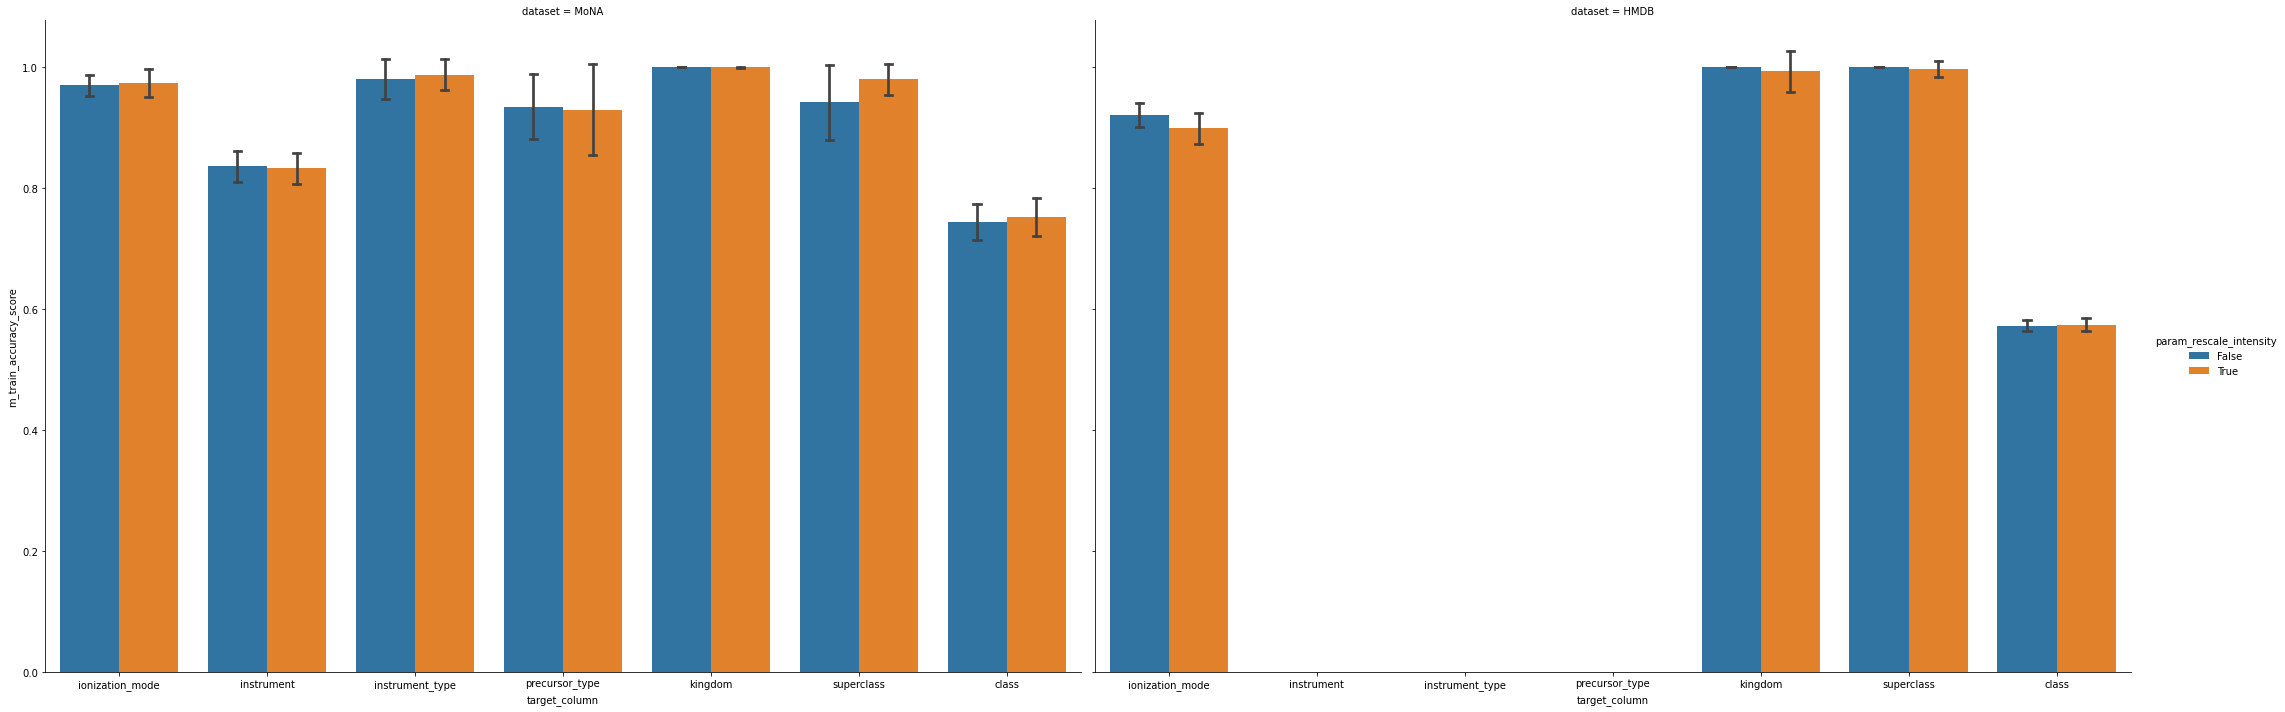

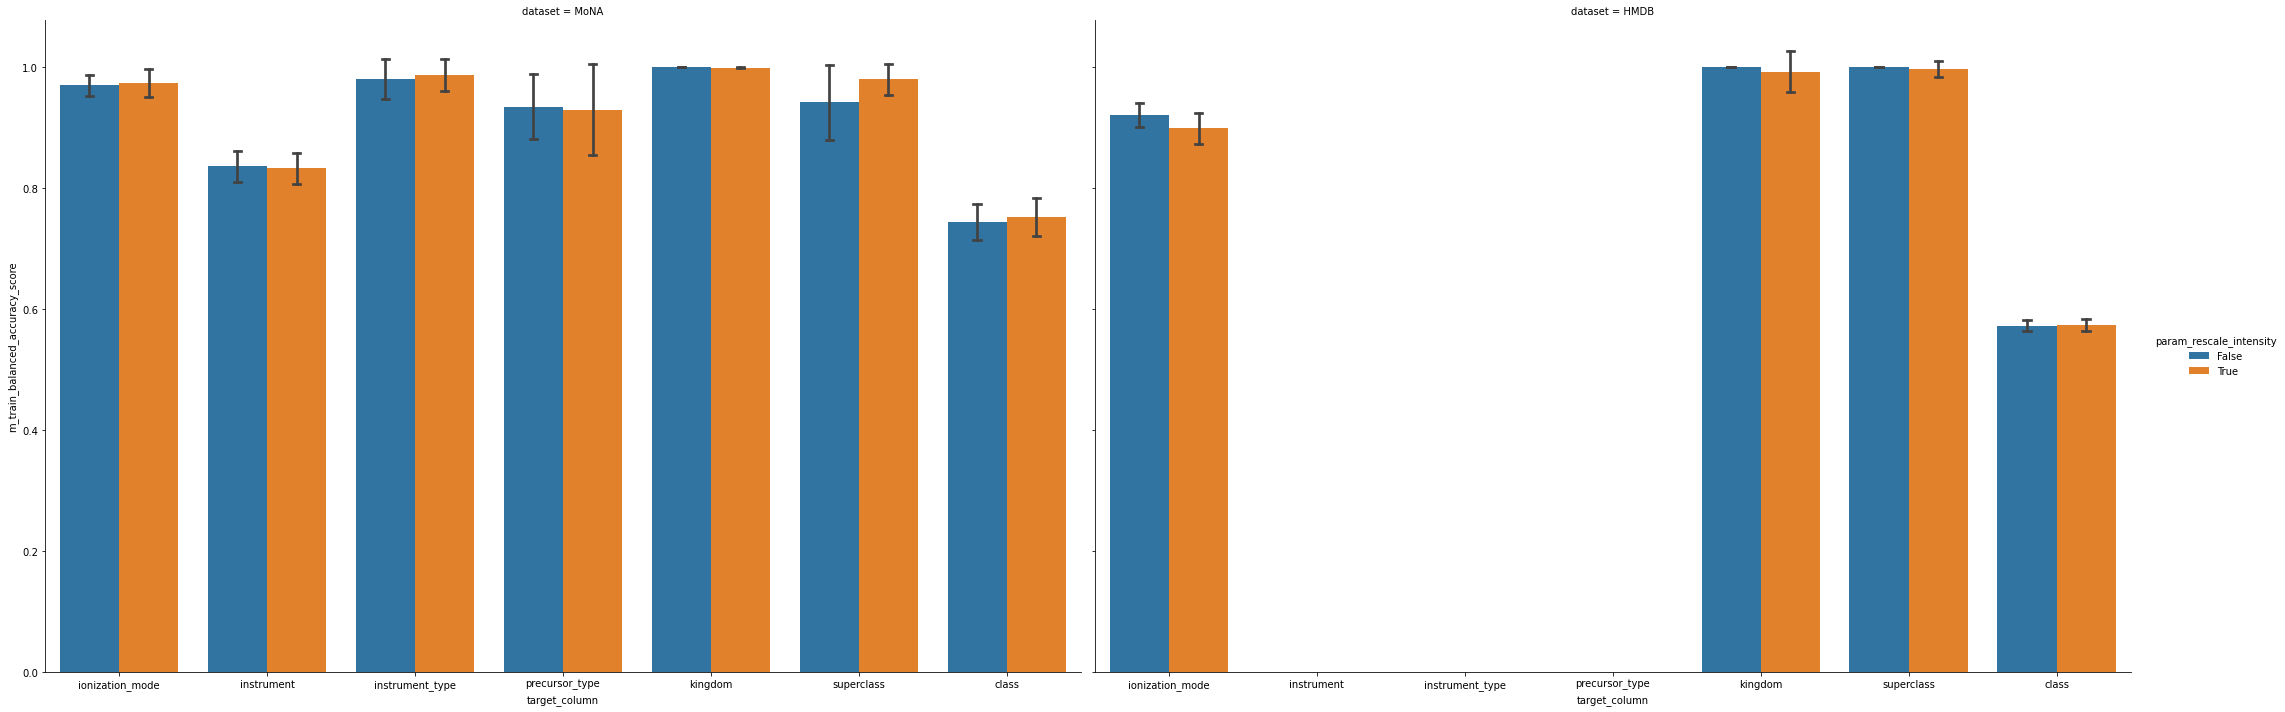

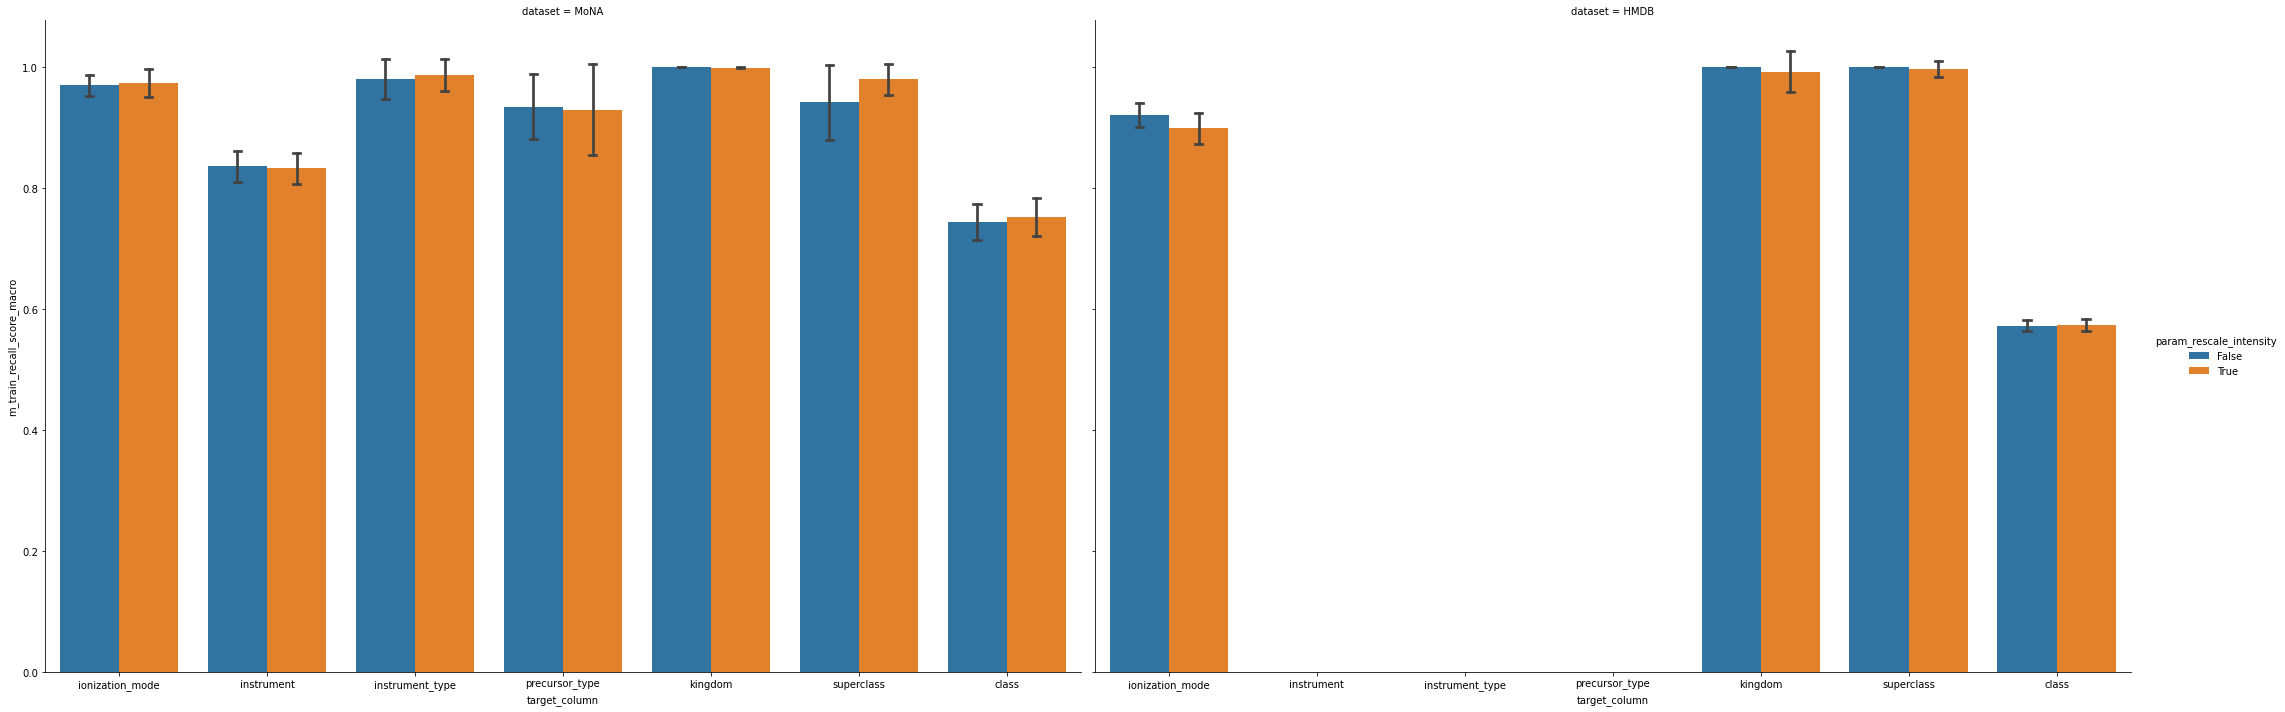

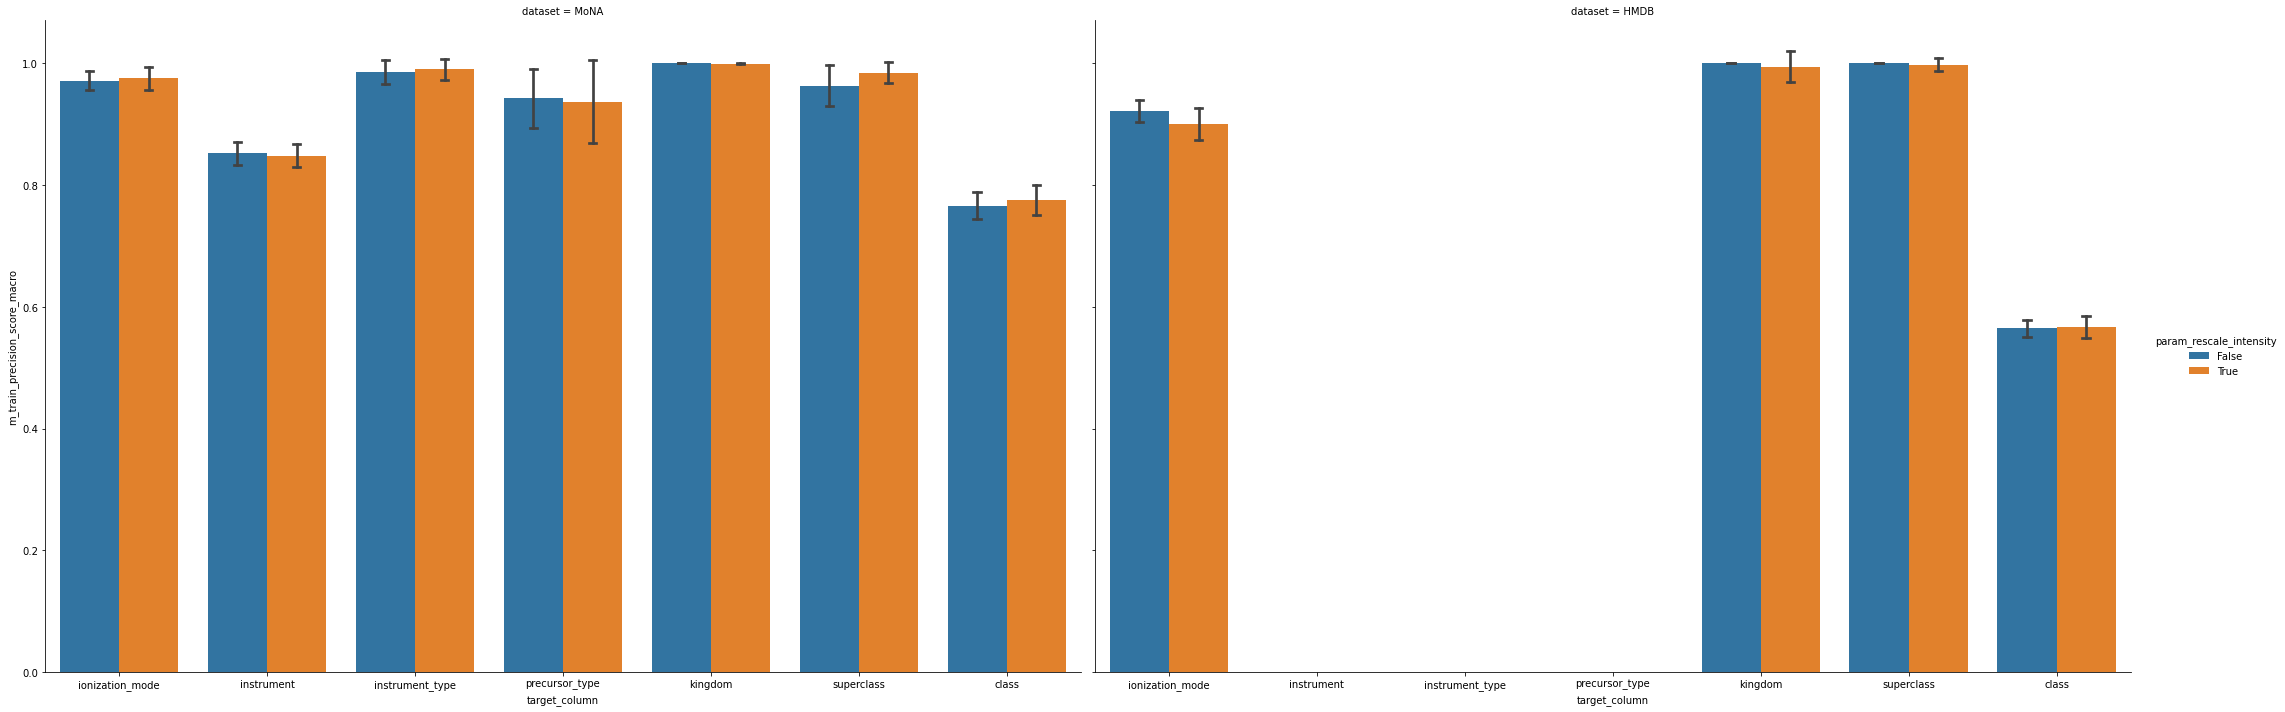

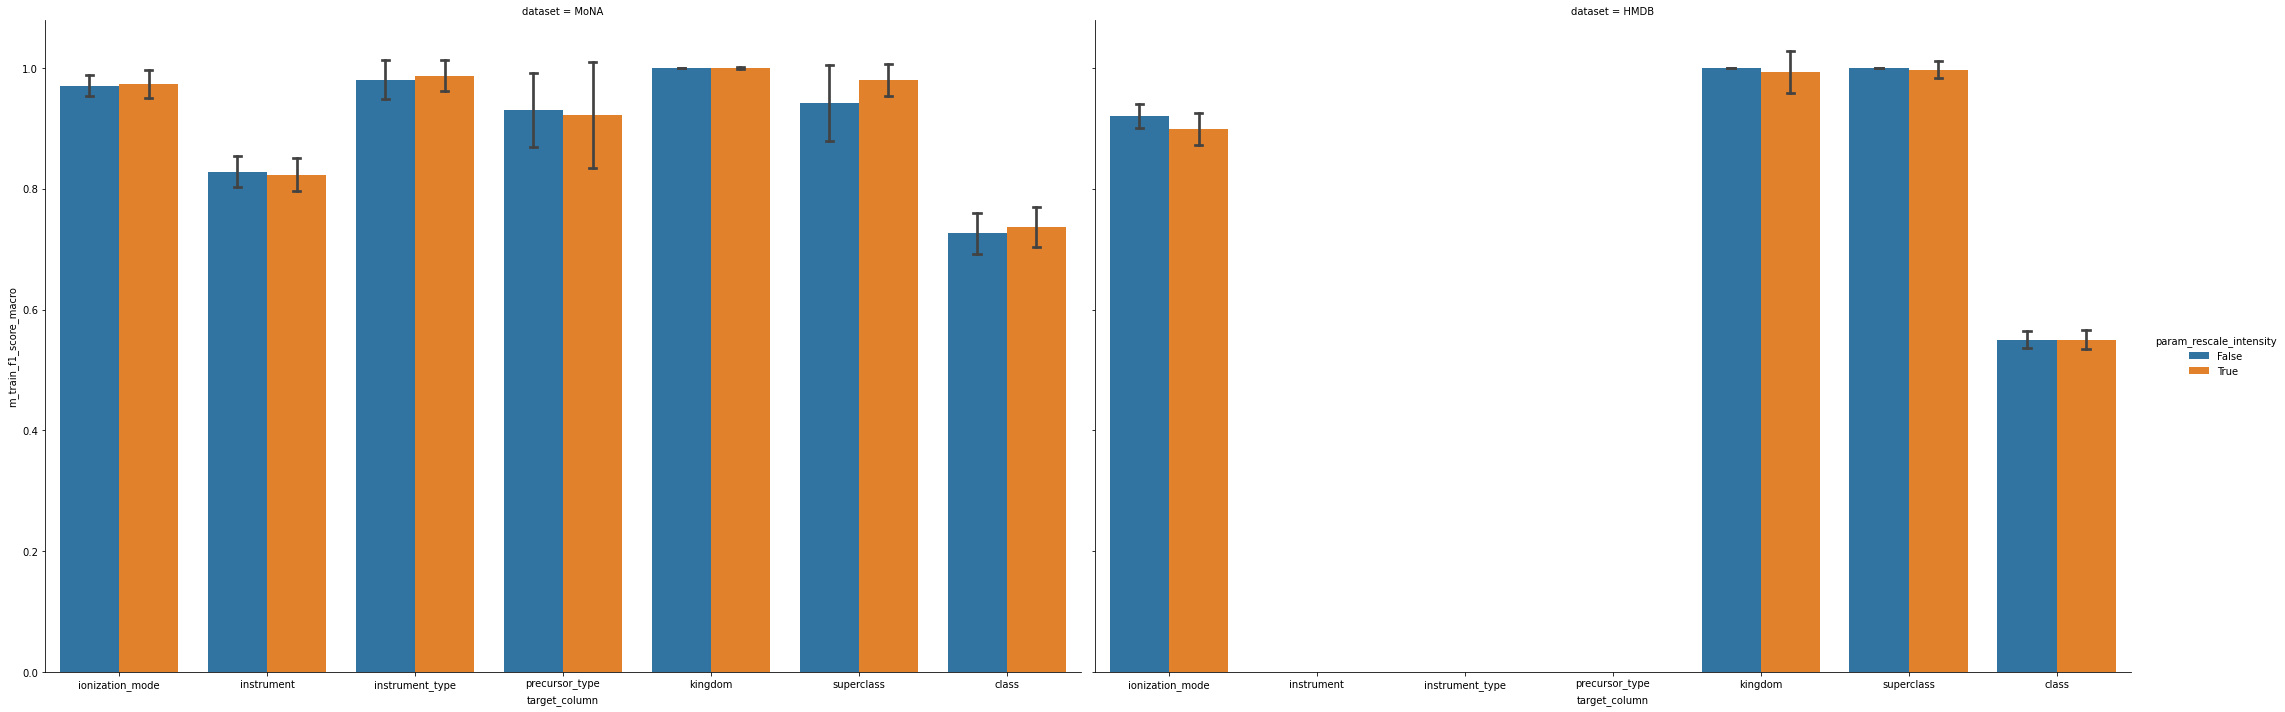

In [8]:
for column in clf_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_rescale_intensity", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Feature importance

Permutation feature importance might vary depending on preprocessing parameters.

In [9]:
target_columns = df['target_column'].unique().tolist()

In [10]:
def extract_pfi(df, target_column):
    import ast
    dfpi = df[df['target_column'].isin([target_column])]
    def extract_pfi_(row):
        fi_dict = ast.literal_eval(row['feature_importance'])
        for k, v in fi_dict.items():
            row['pfi_' + k] = v
        return row
    return dfpi.apply(extract_pfi_, axis=1)

def plot_pfi(df, target_column, hue=None):
    dfpi = extract_pfi(df, target_column)
    pfi_cols = list(filter(lambda x: x.startswith('pfi_'), list(dfpi.columns)))
    oth_cols = list(filter(lambda x: not x.startswith('pfi_'), list(dfpi.columns)))
    dfpi = dfpi.melt(id_vars=oth_cols, value_vars=pfi_cols, var_name='PFI_column', value_name='PFI')
    result = dfpi.groupby(["PFI_column"])['PFI'].aggregate(np.mean).reset_index().sort_values('PFI', ascending=False)
    ax = sns.catplot(data=dfpi, x="PFI", y="PFI_column", hue=hue, col='dataset', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, order=result['PFI_column'])
    ax.fig.suptitle("PFI for %s target variable" % target_column)


Merge tables and preprocess feature_importance column. Export clean table to CSV.

In [11]:
dfs_ = [extract_pfi(df, tc) for tc in target_columns]
dfs = pd.concat(dfs_, ignore_index=True)
cols = columns.copy()
cols.remove('feature_importance')
pfi_cols = list(filter(lambda x: x.startswith('pfi_'), list(dfs.columns)))
dfs = dfs[cols + pfi_cols]
dfs.to_csv(utils.get_project_path() / '.model' / 'classifier_all_features.csv')

### General

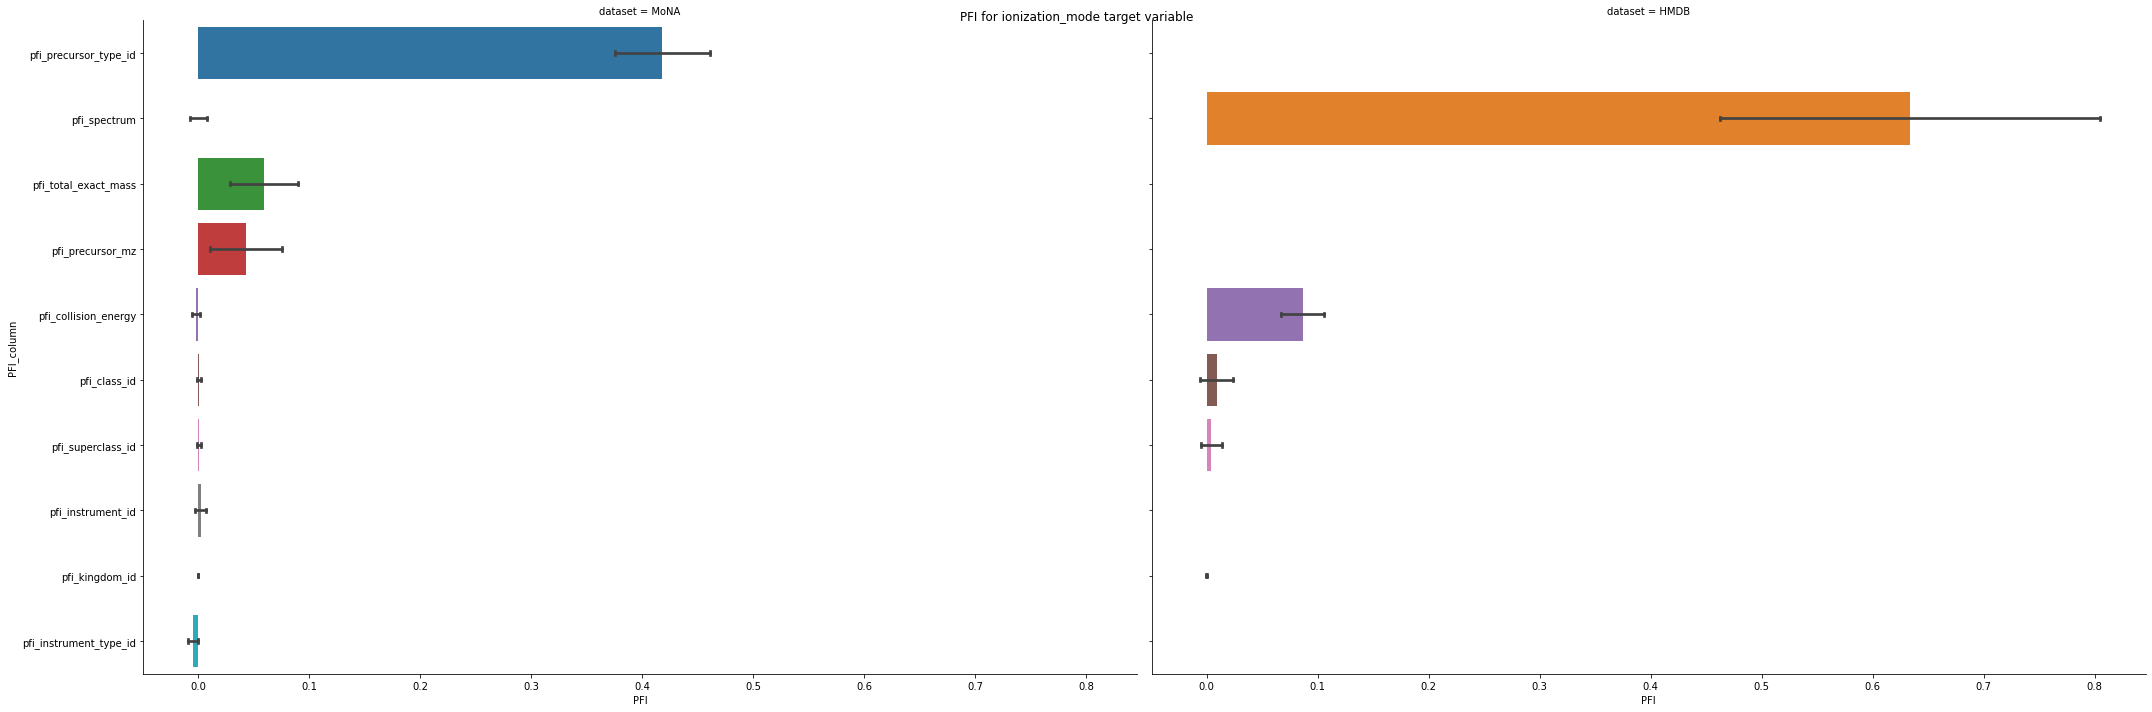

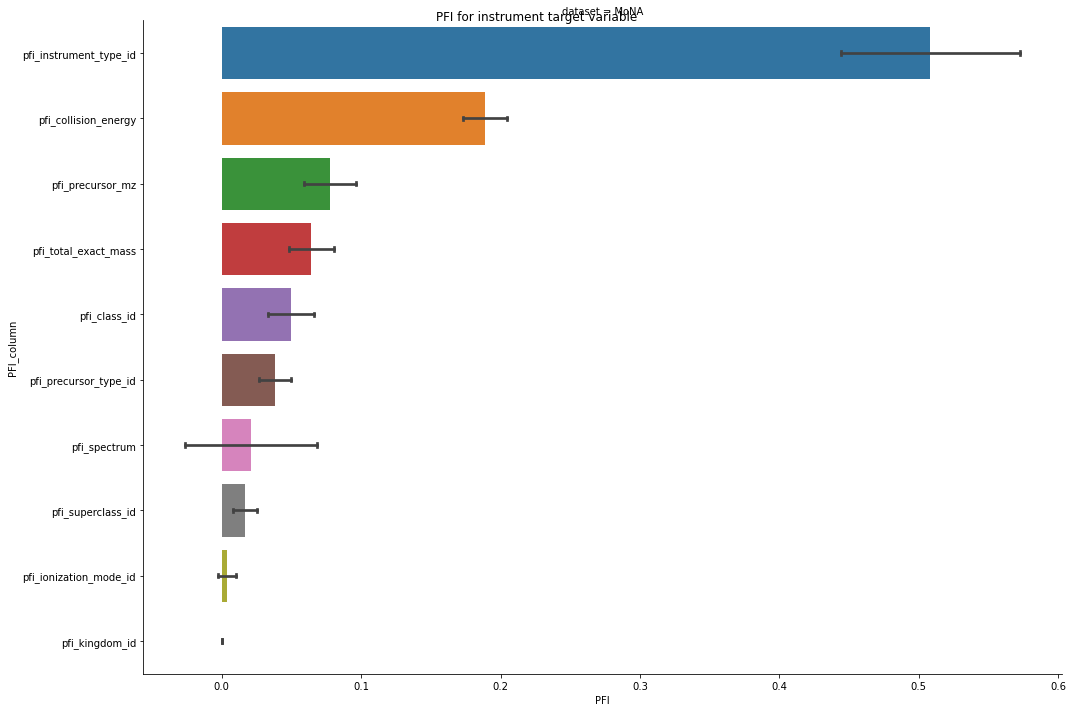

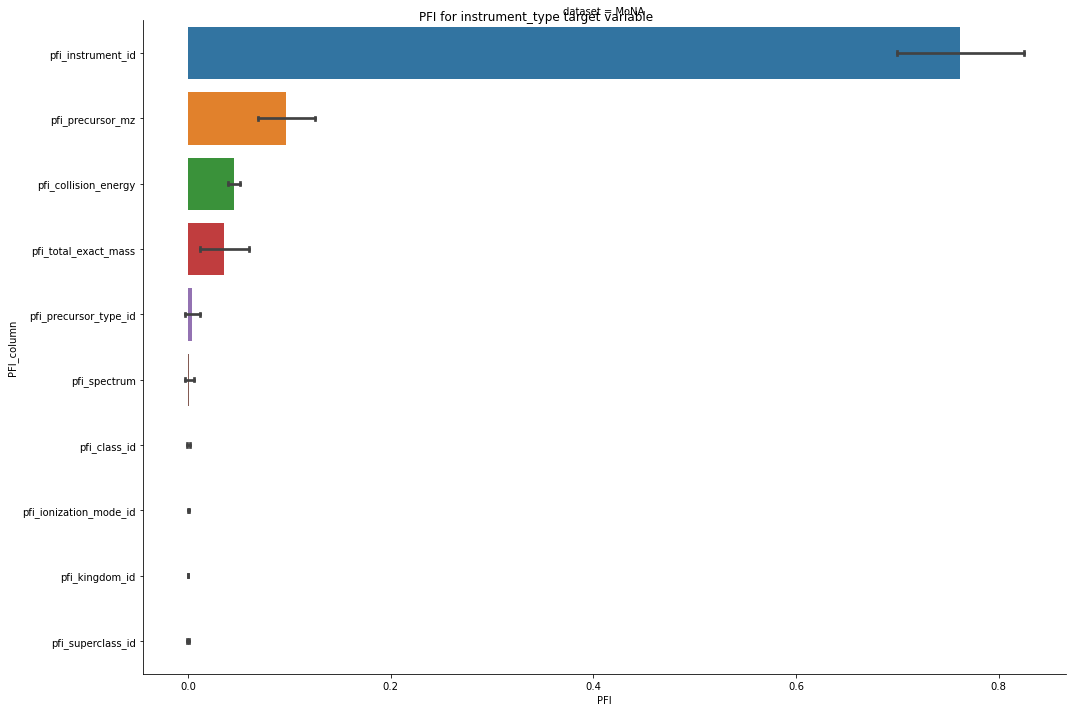

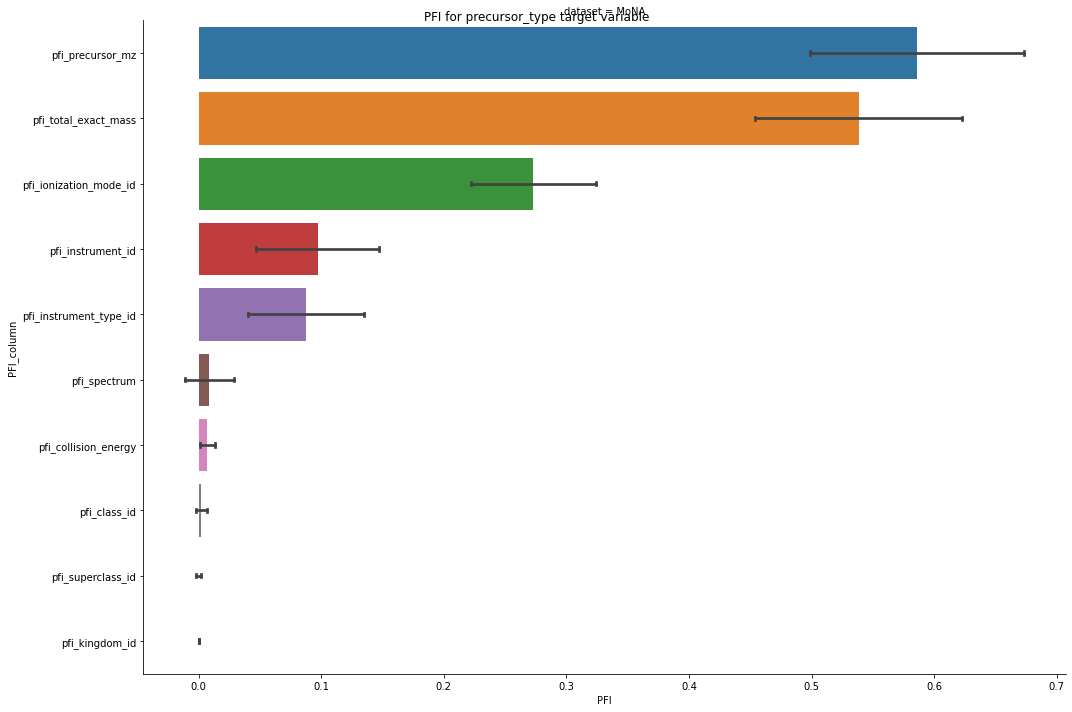

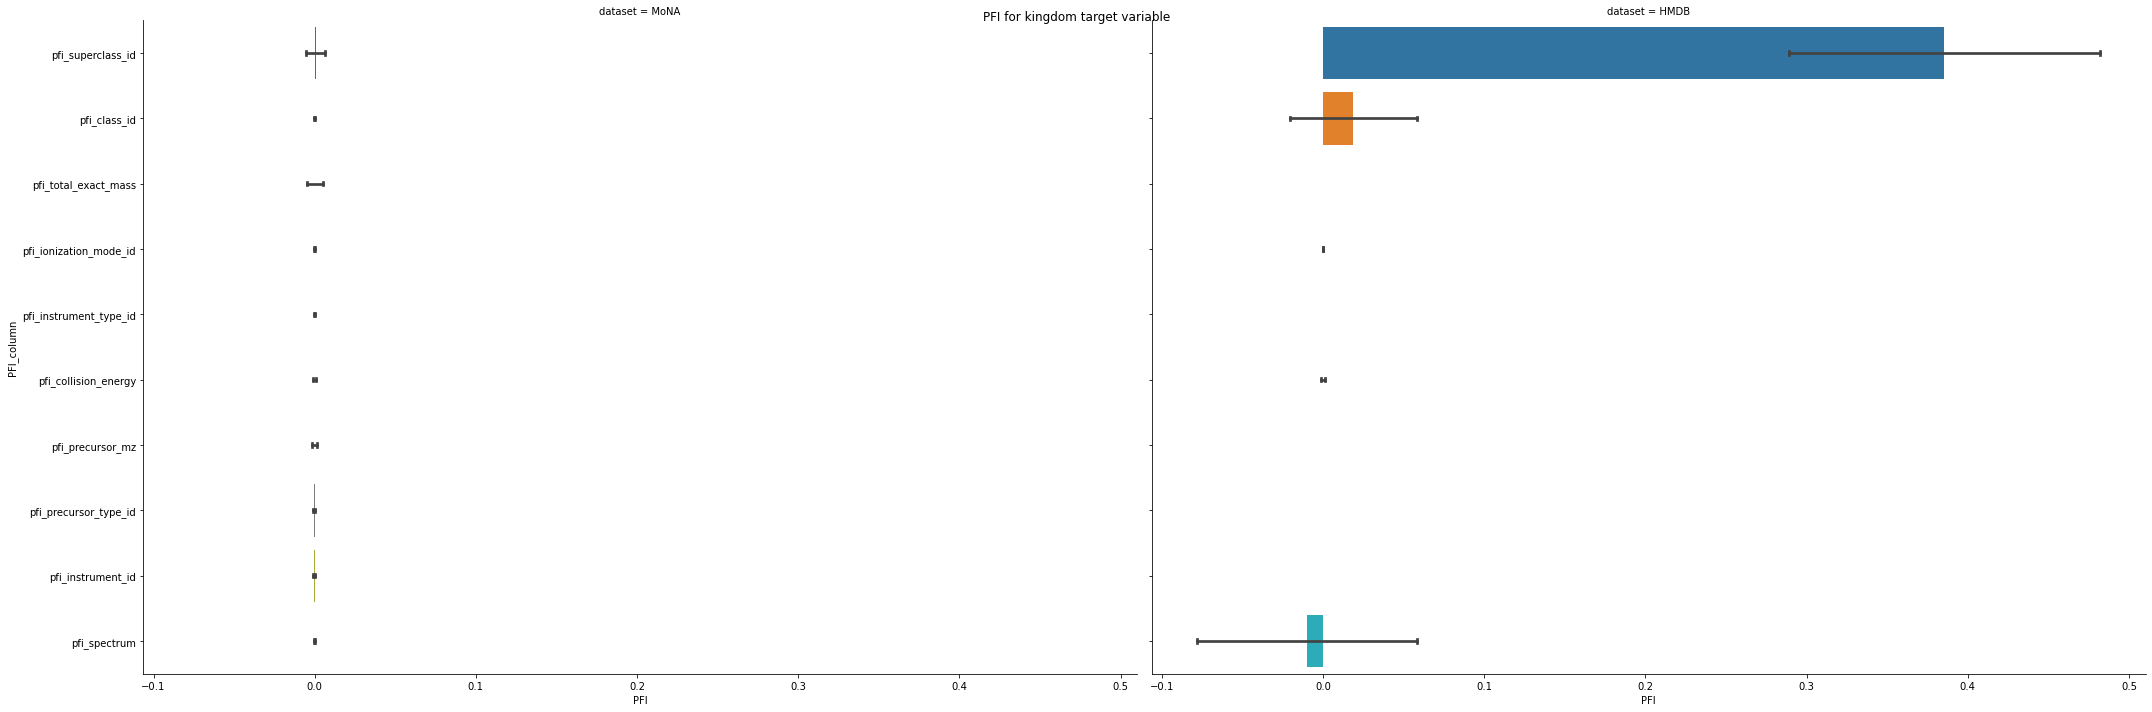

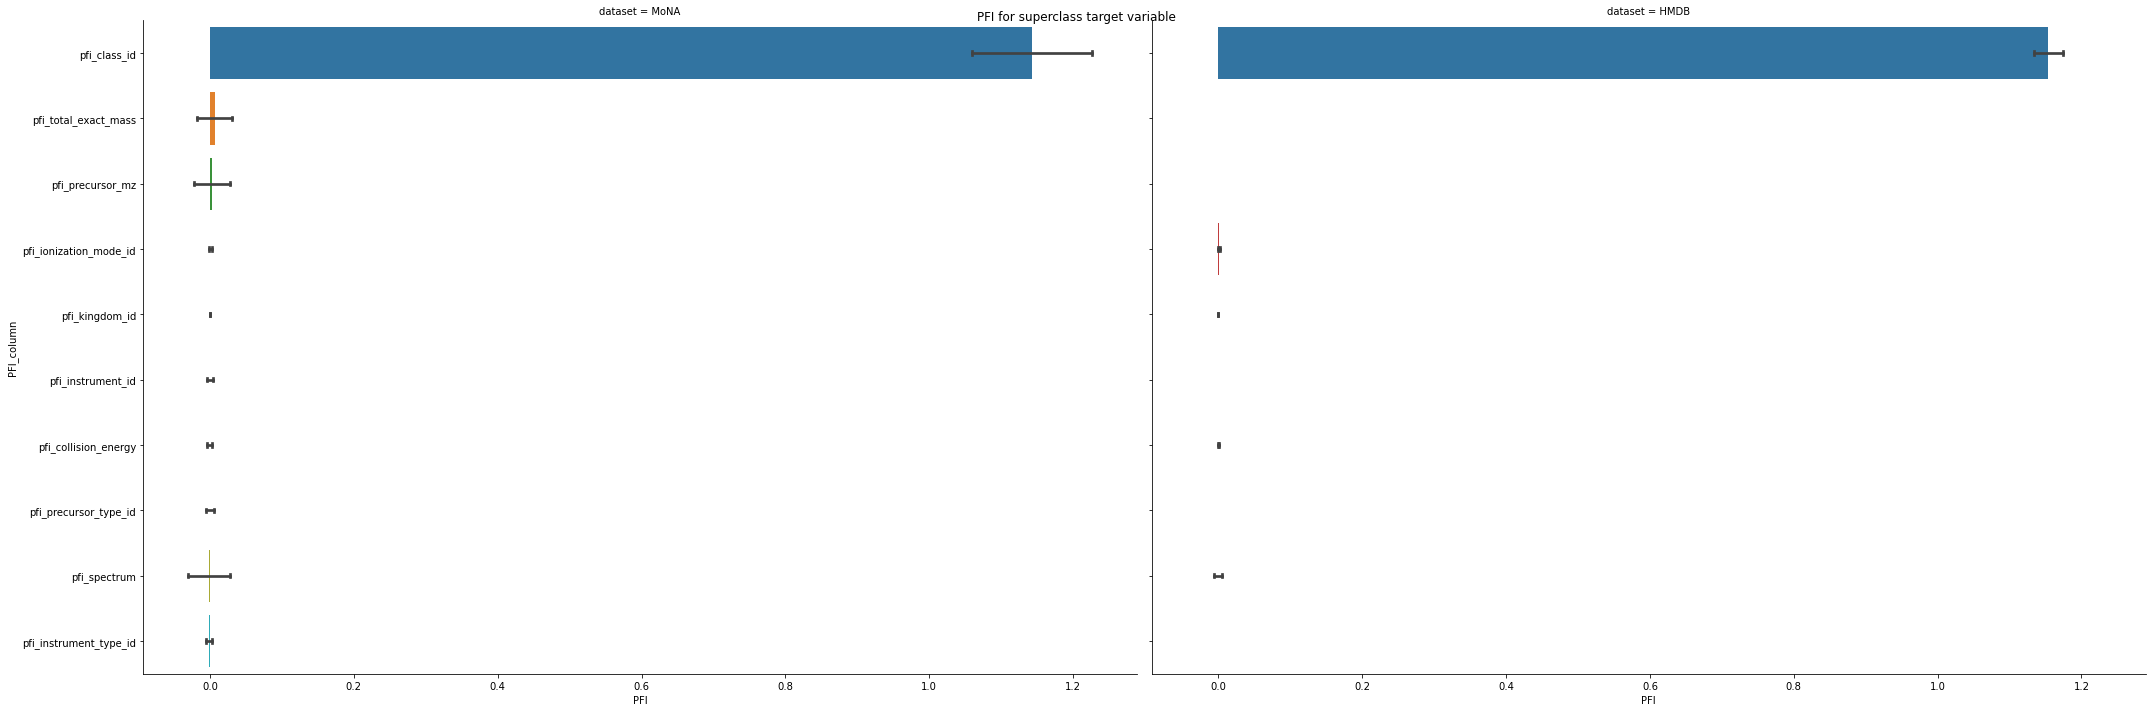

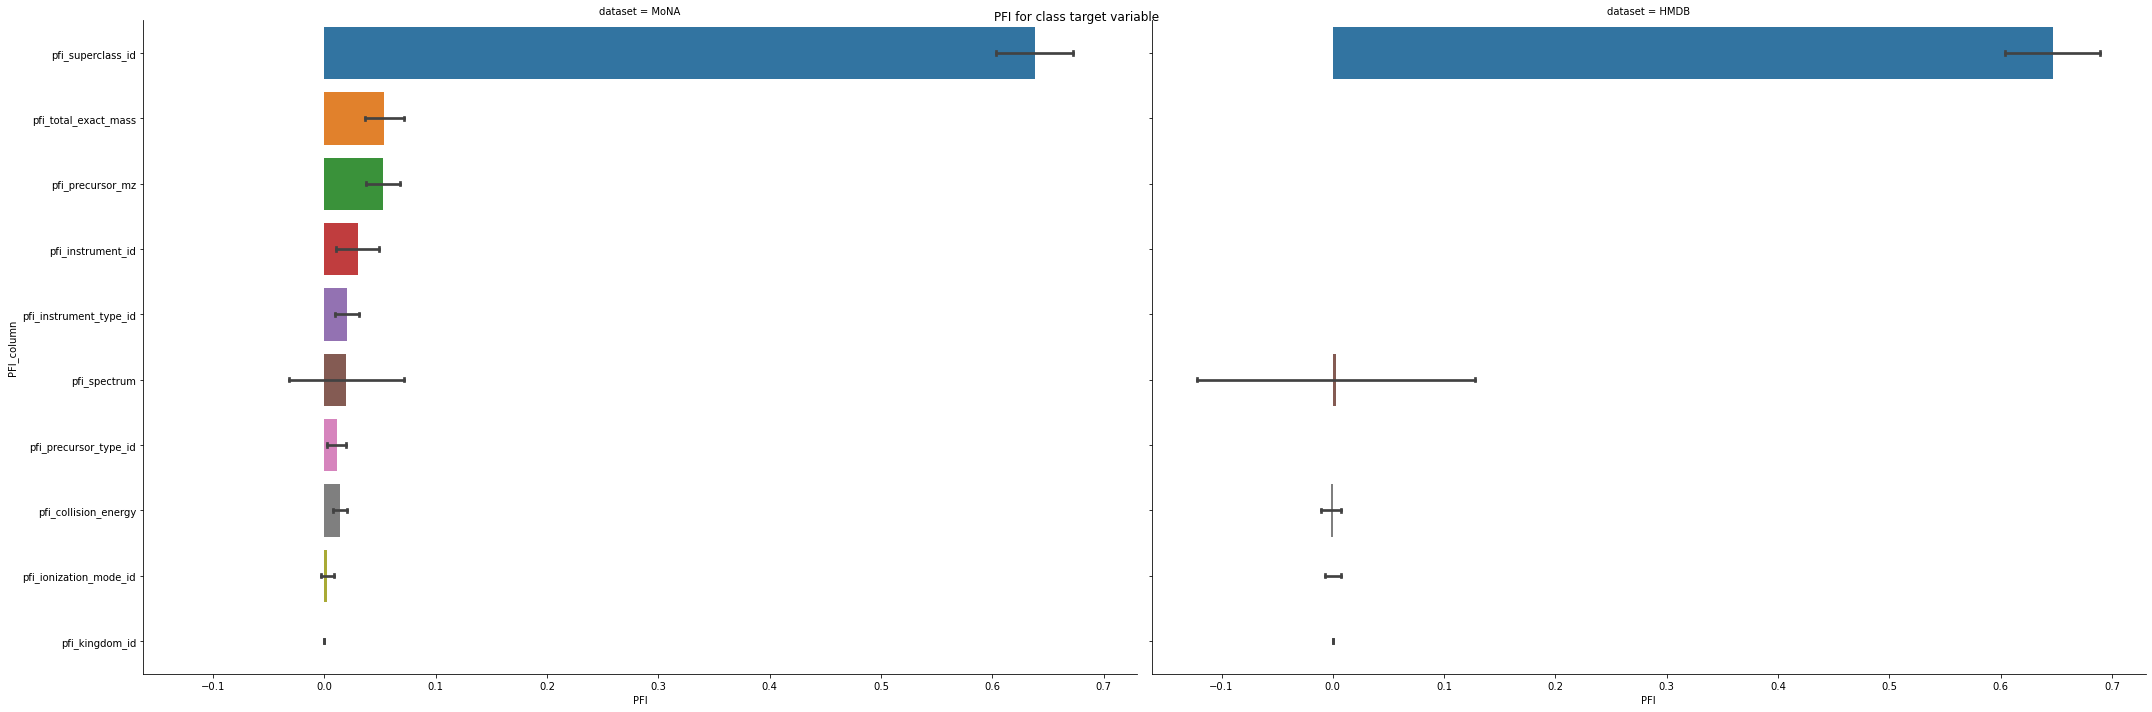

In [61]:
for tc in target_columns:
    plot_pfi(df, tc)

### Number of peaks

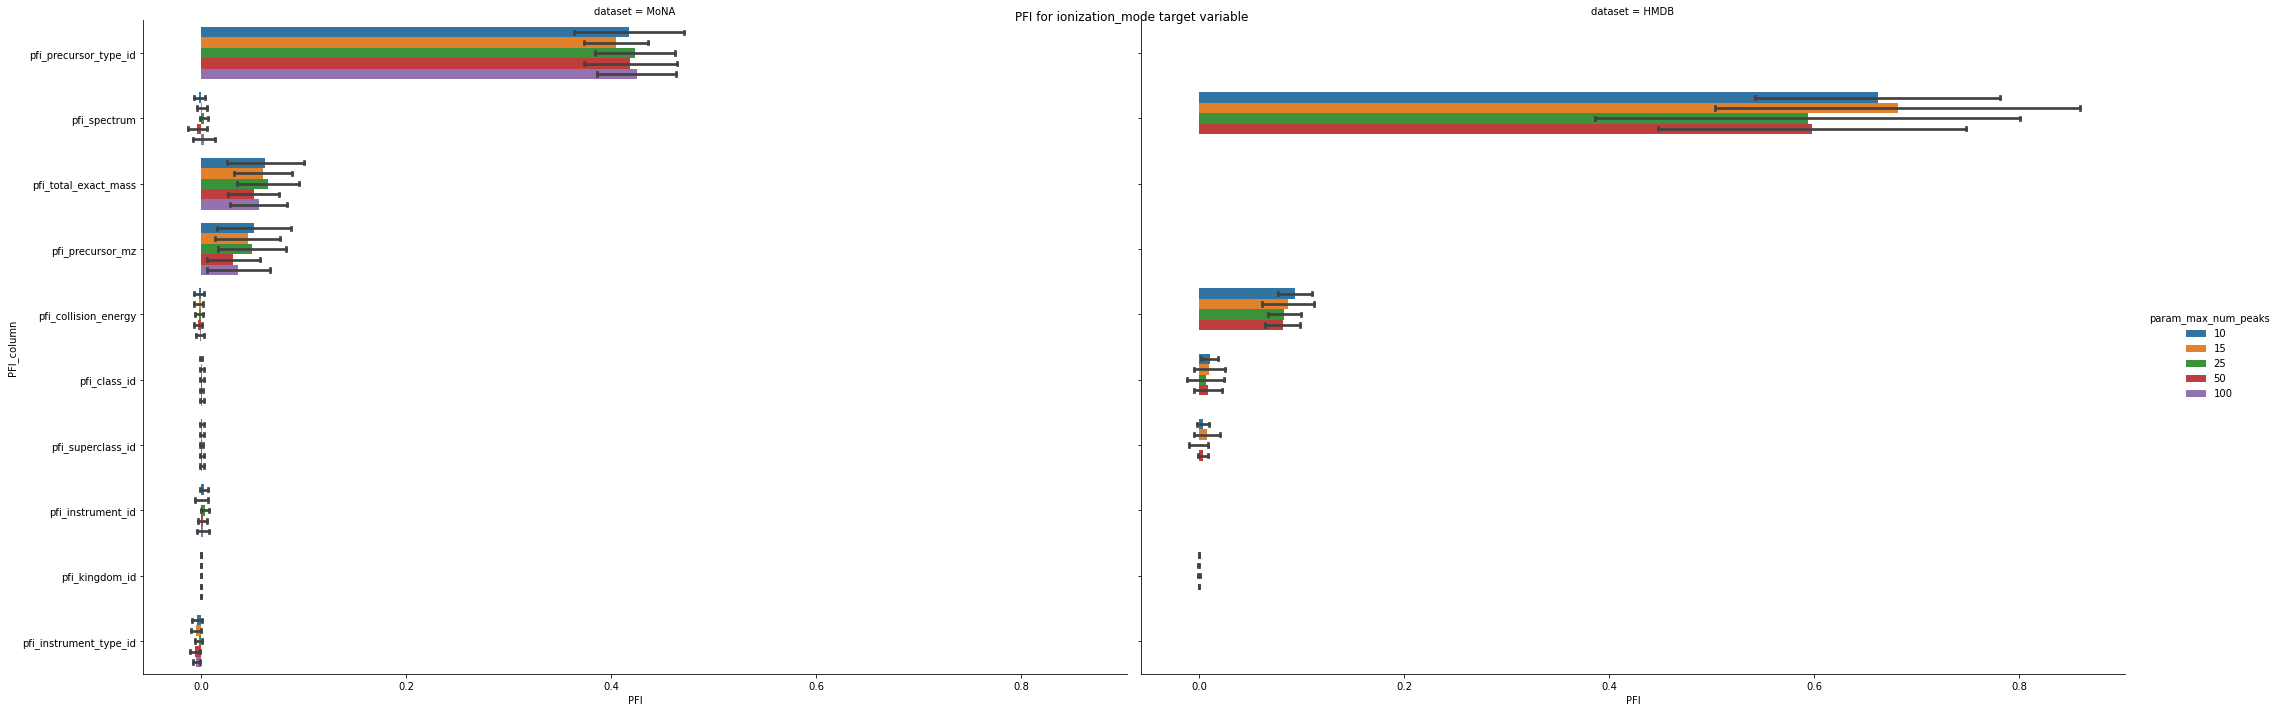

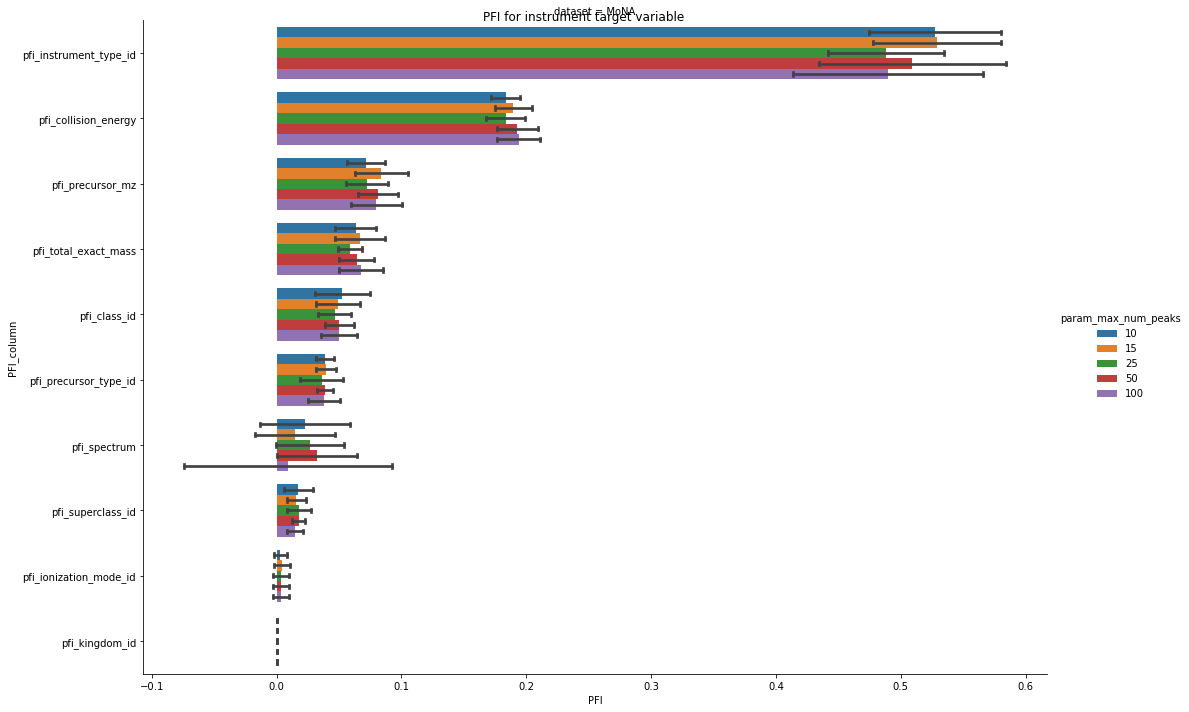

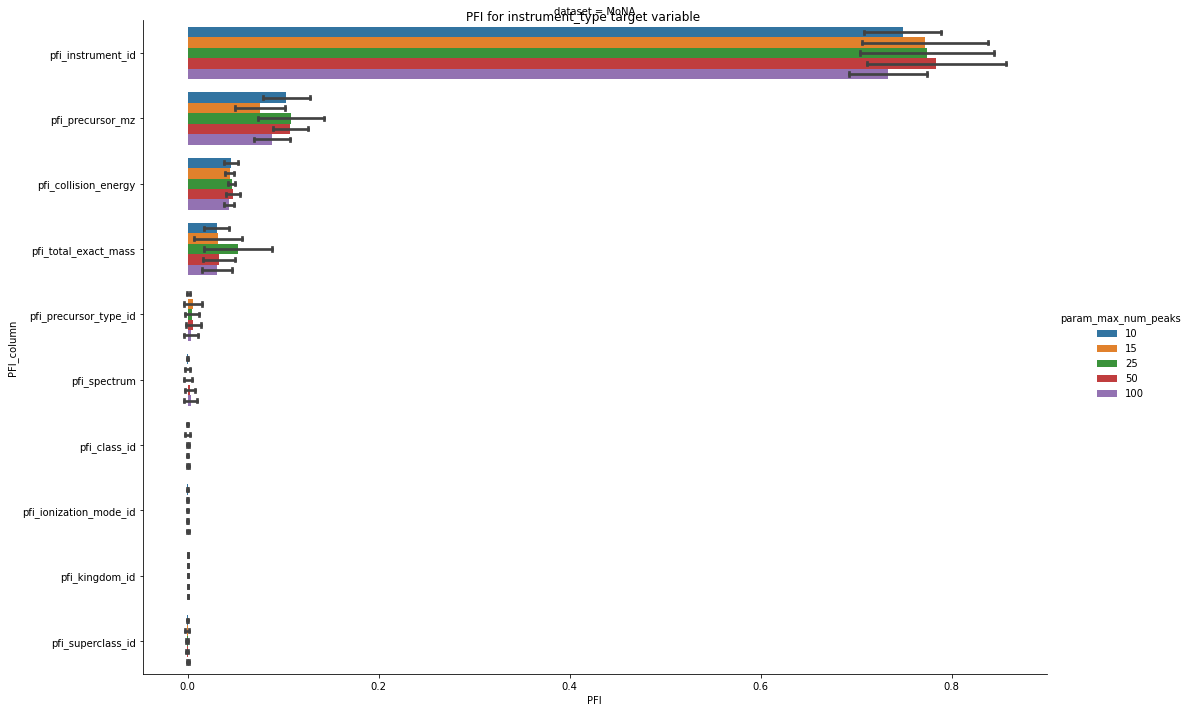

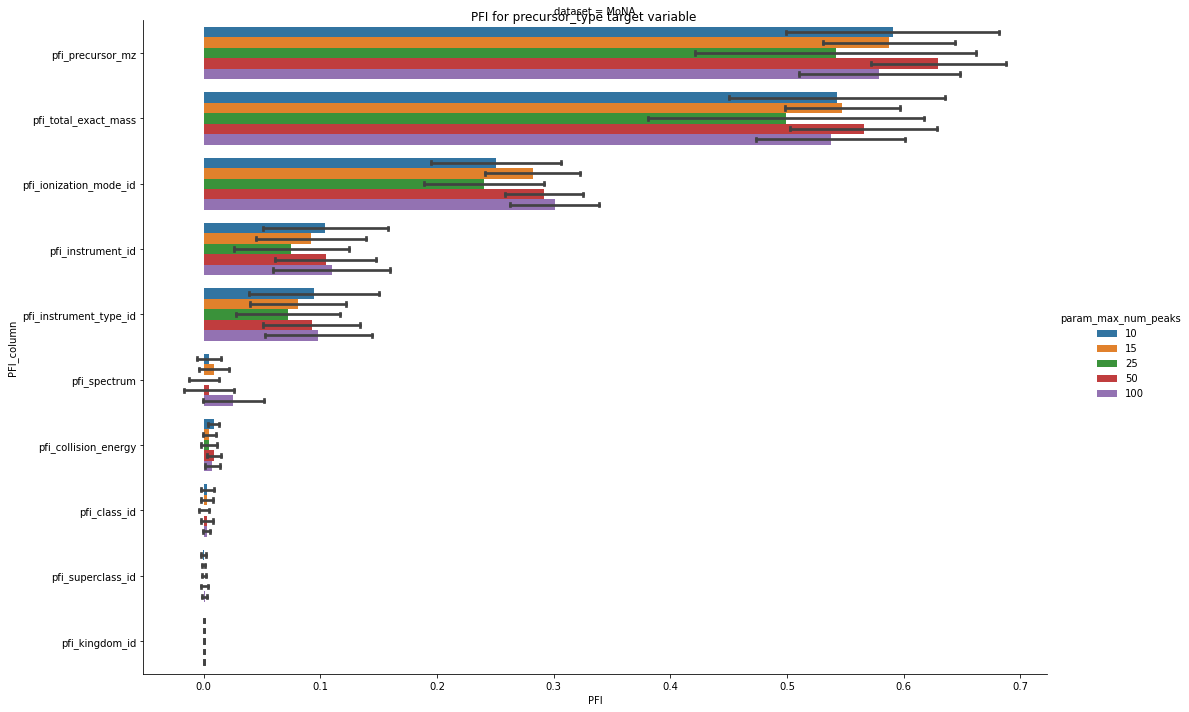

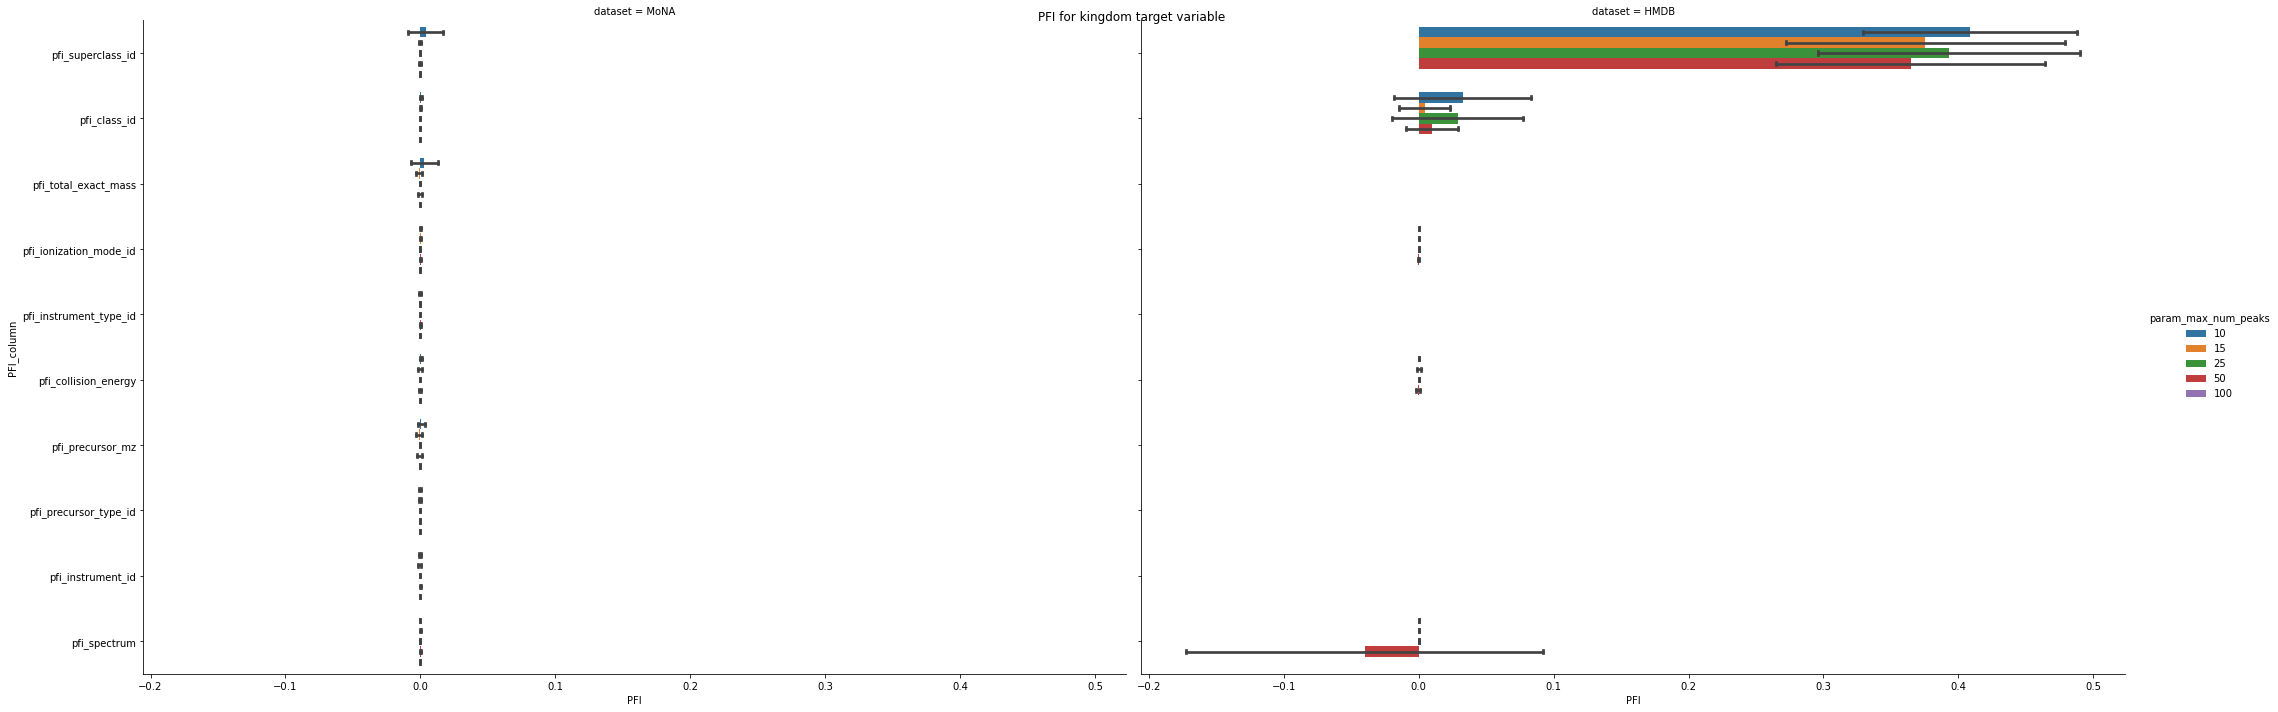

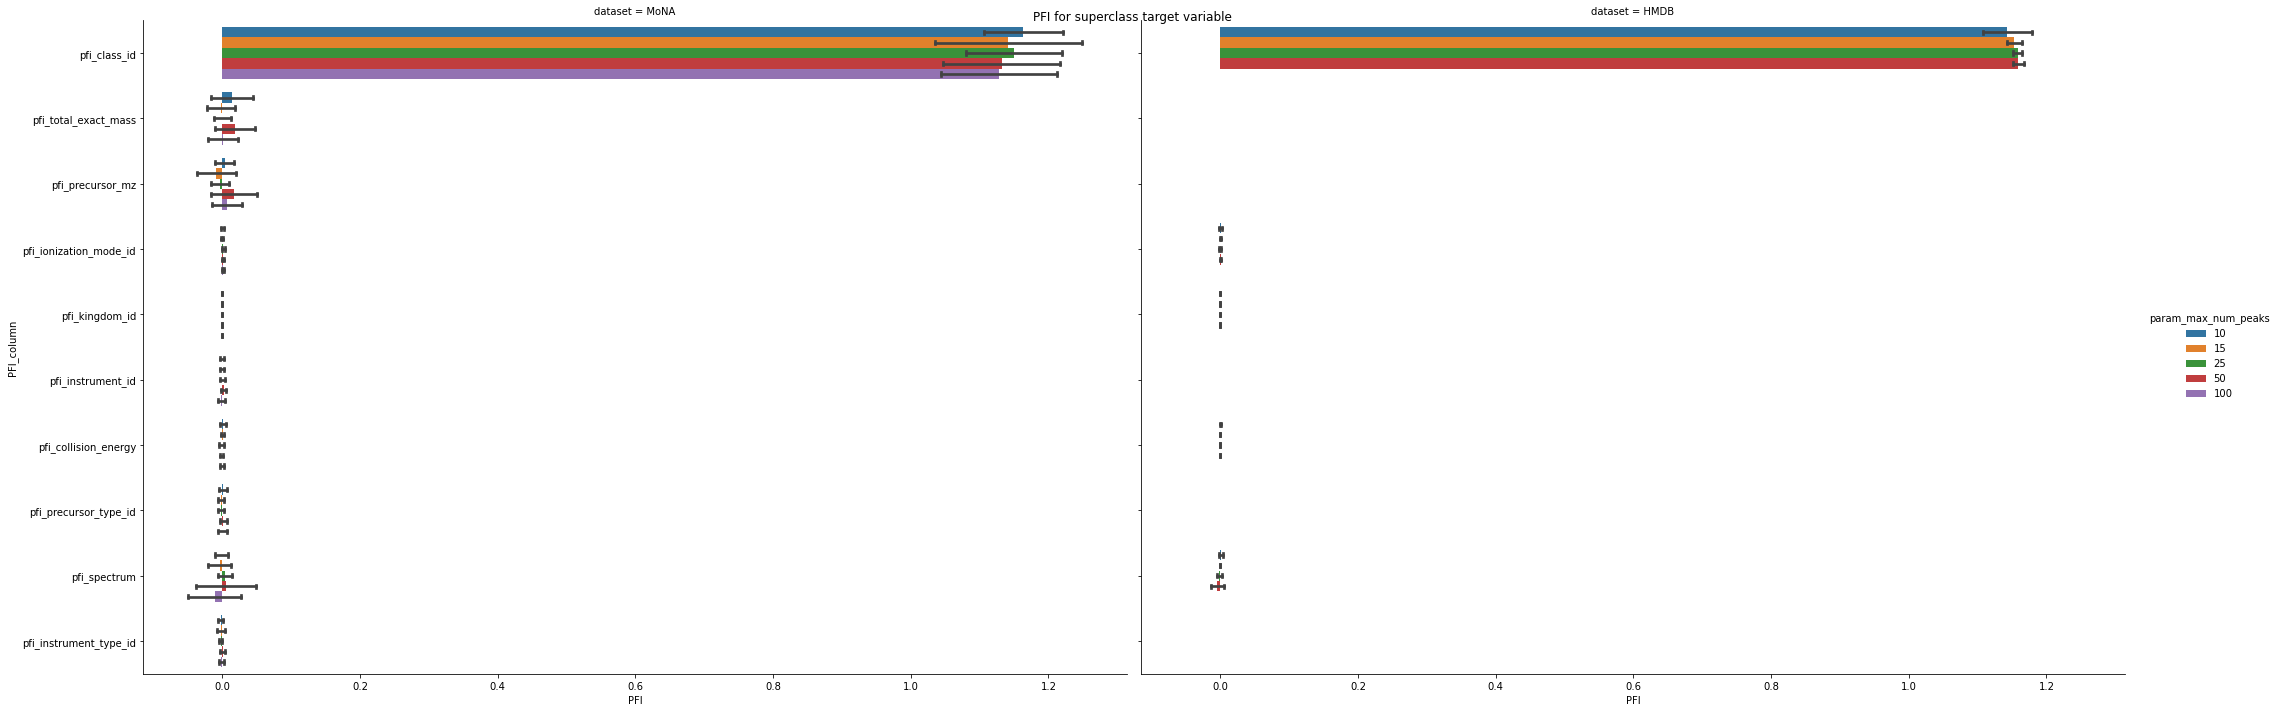

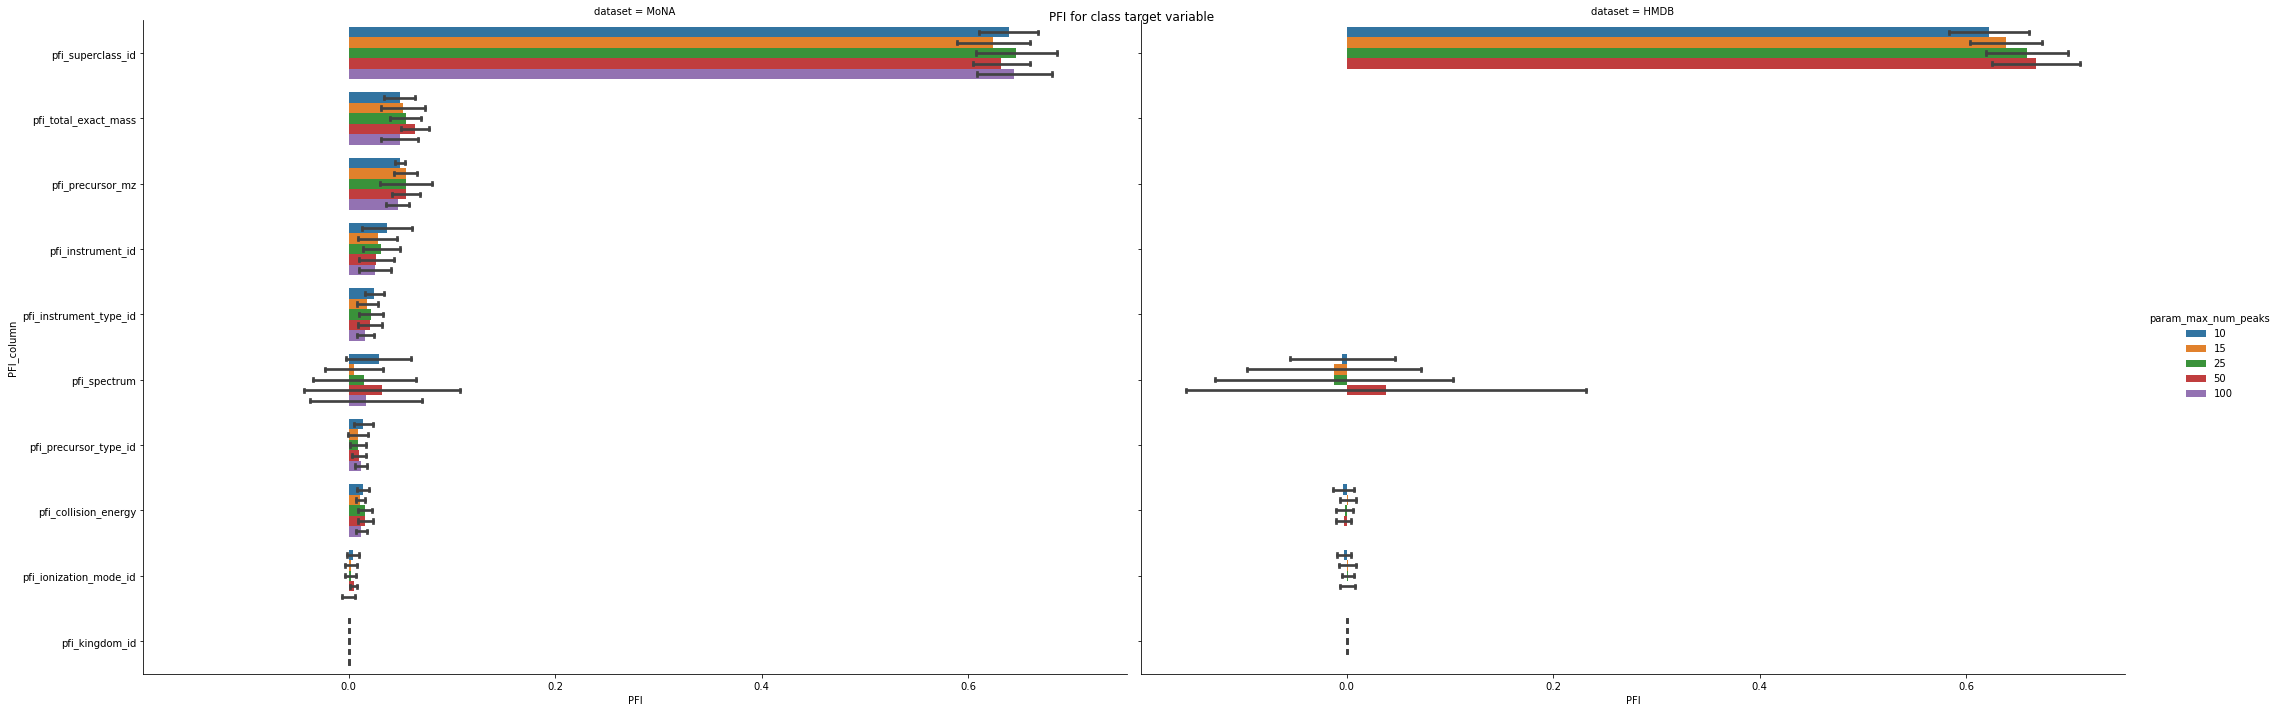

In [62]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_max_num_peaks')

### Minimum intensity

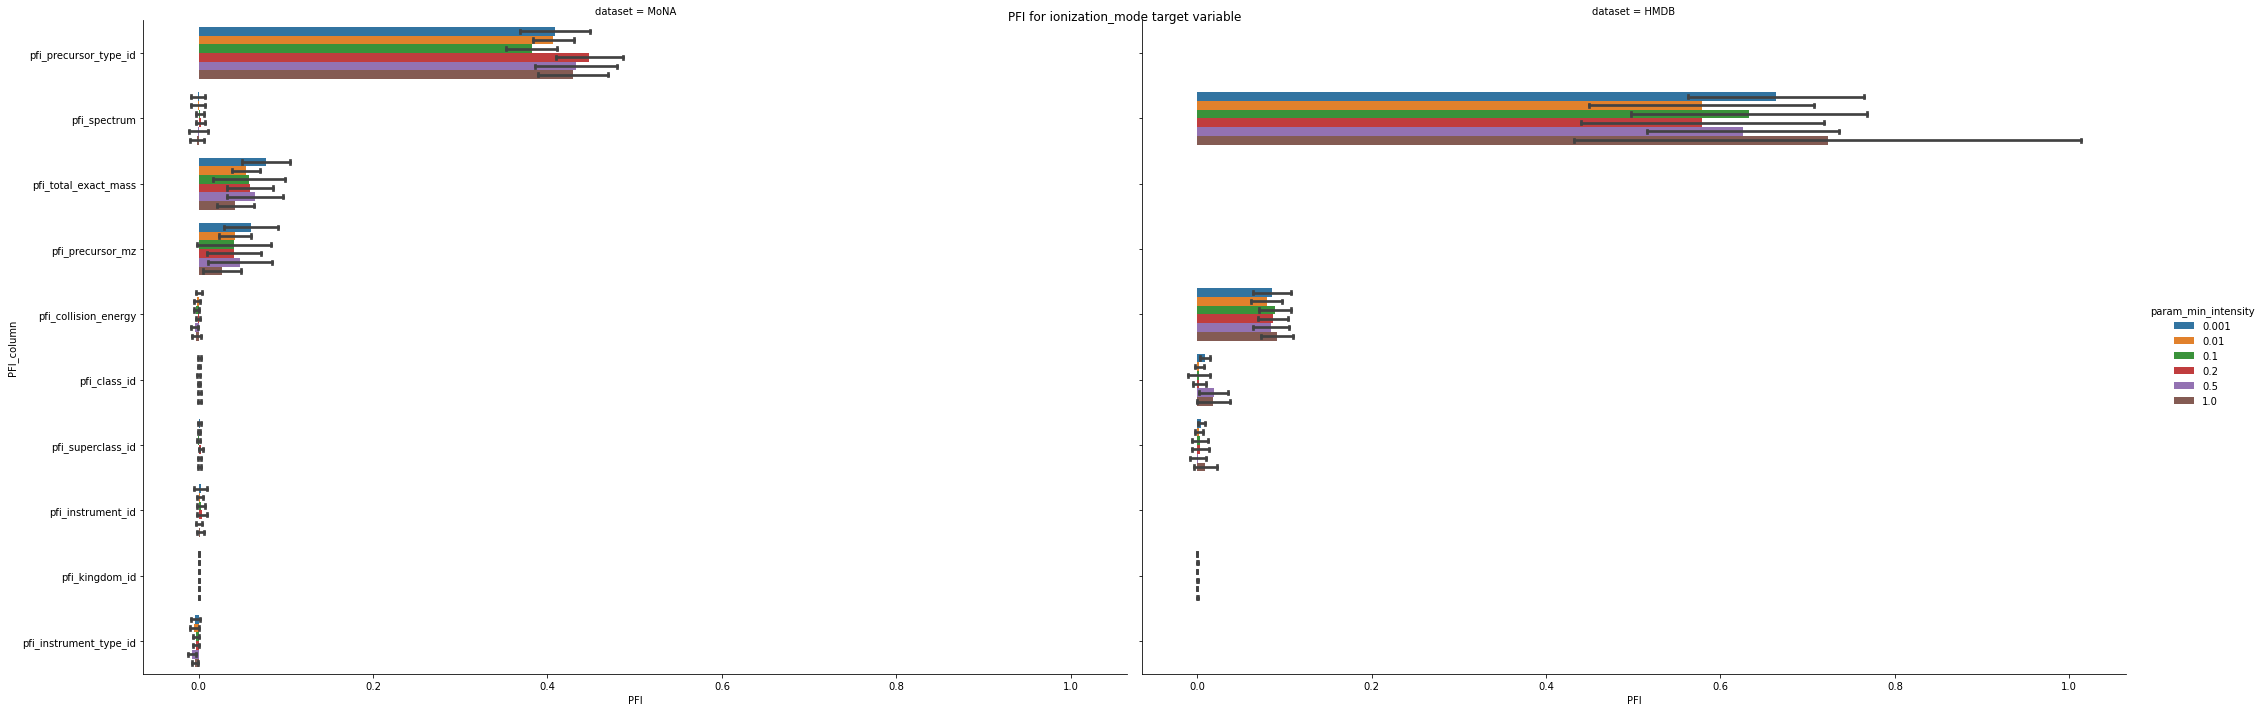

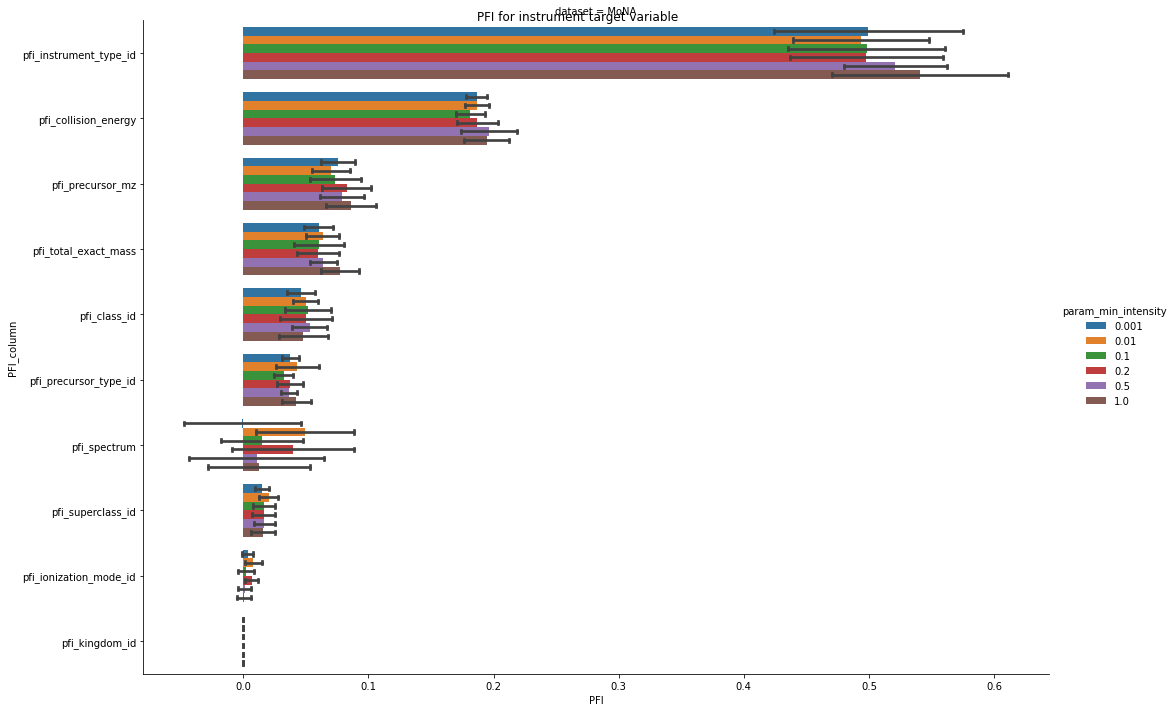

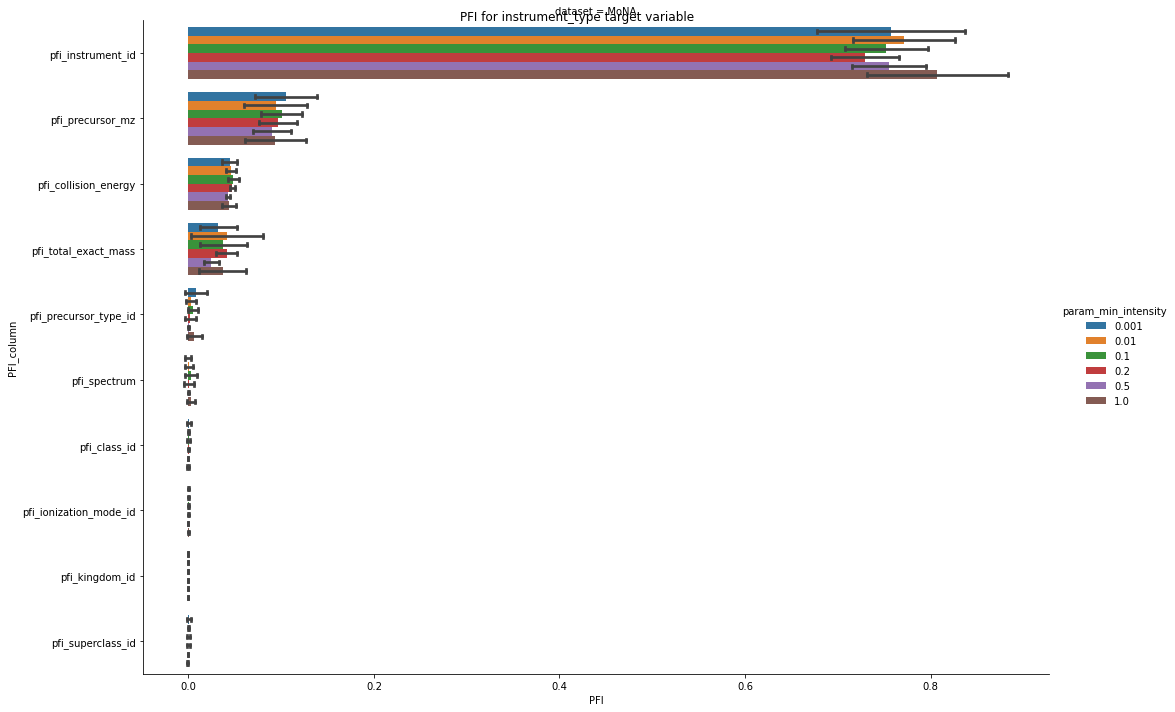

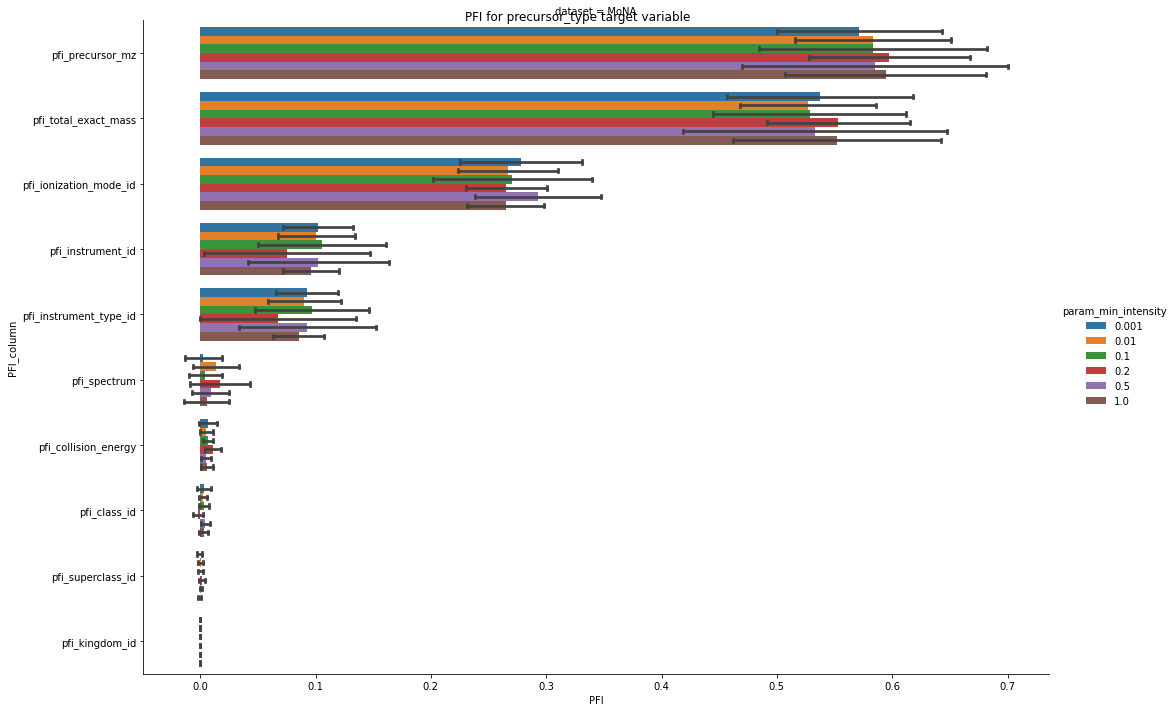

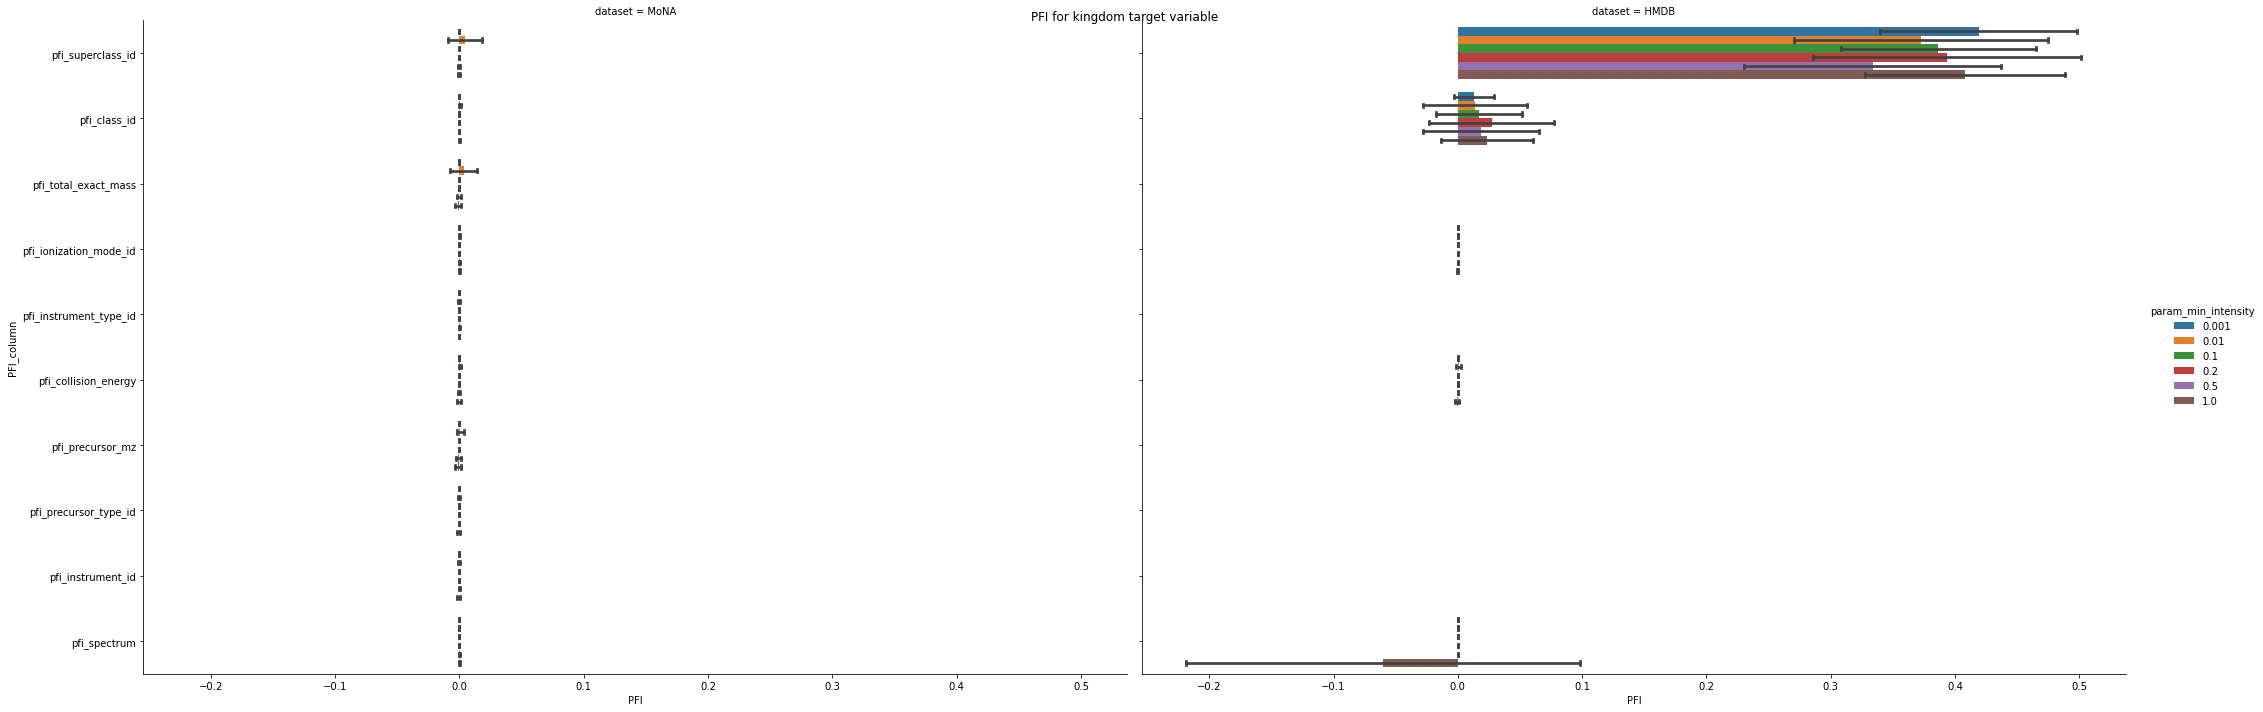

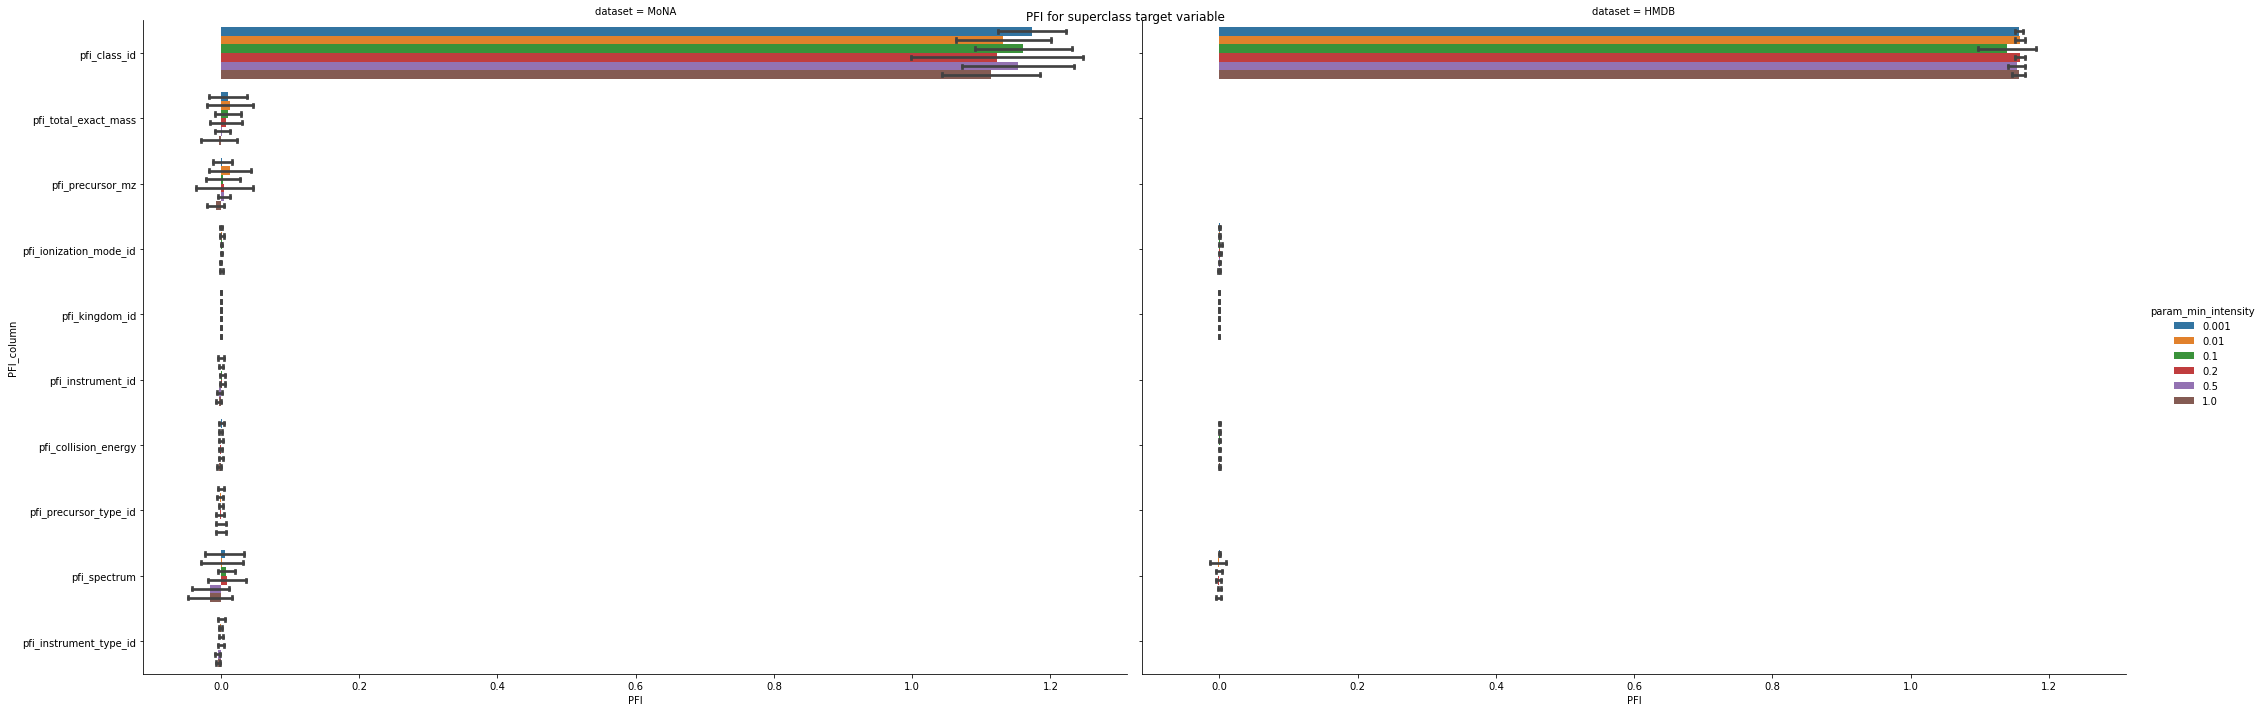

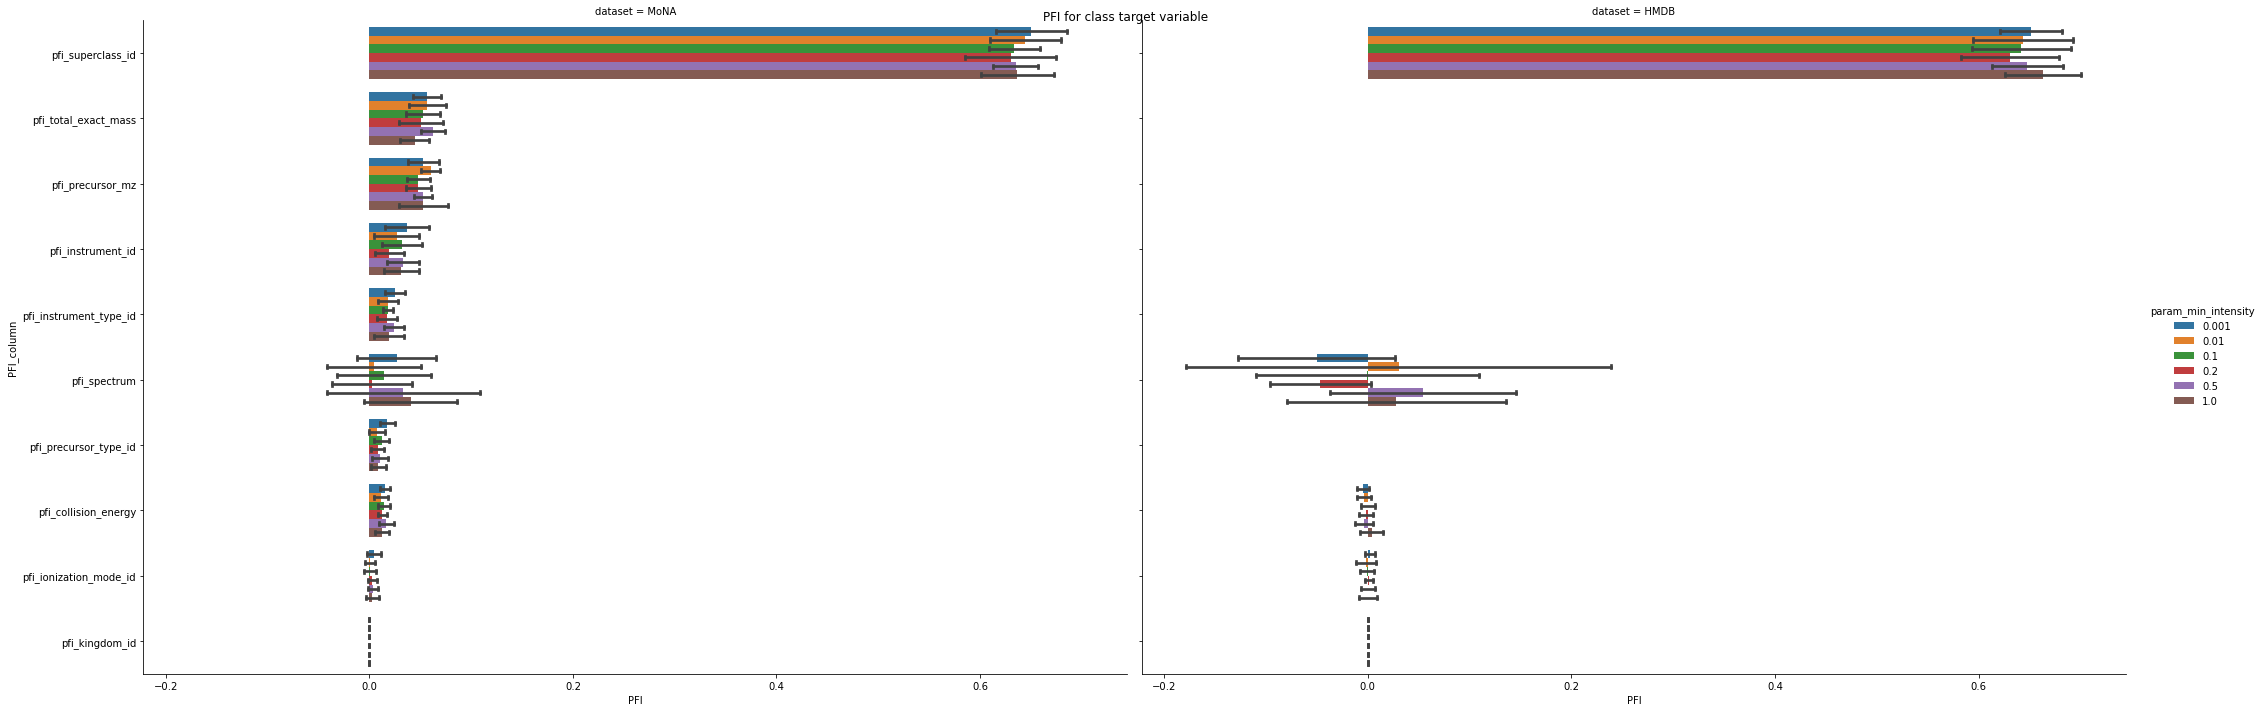

In [63]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_min_intensity')

### Rescale intensity

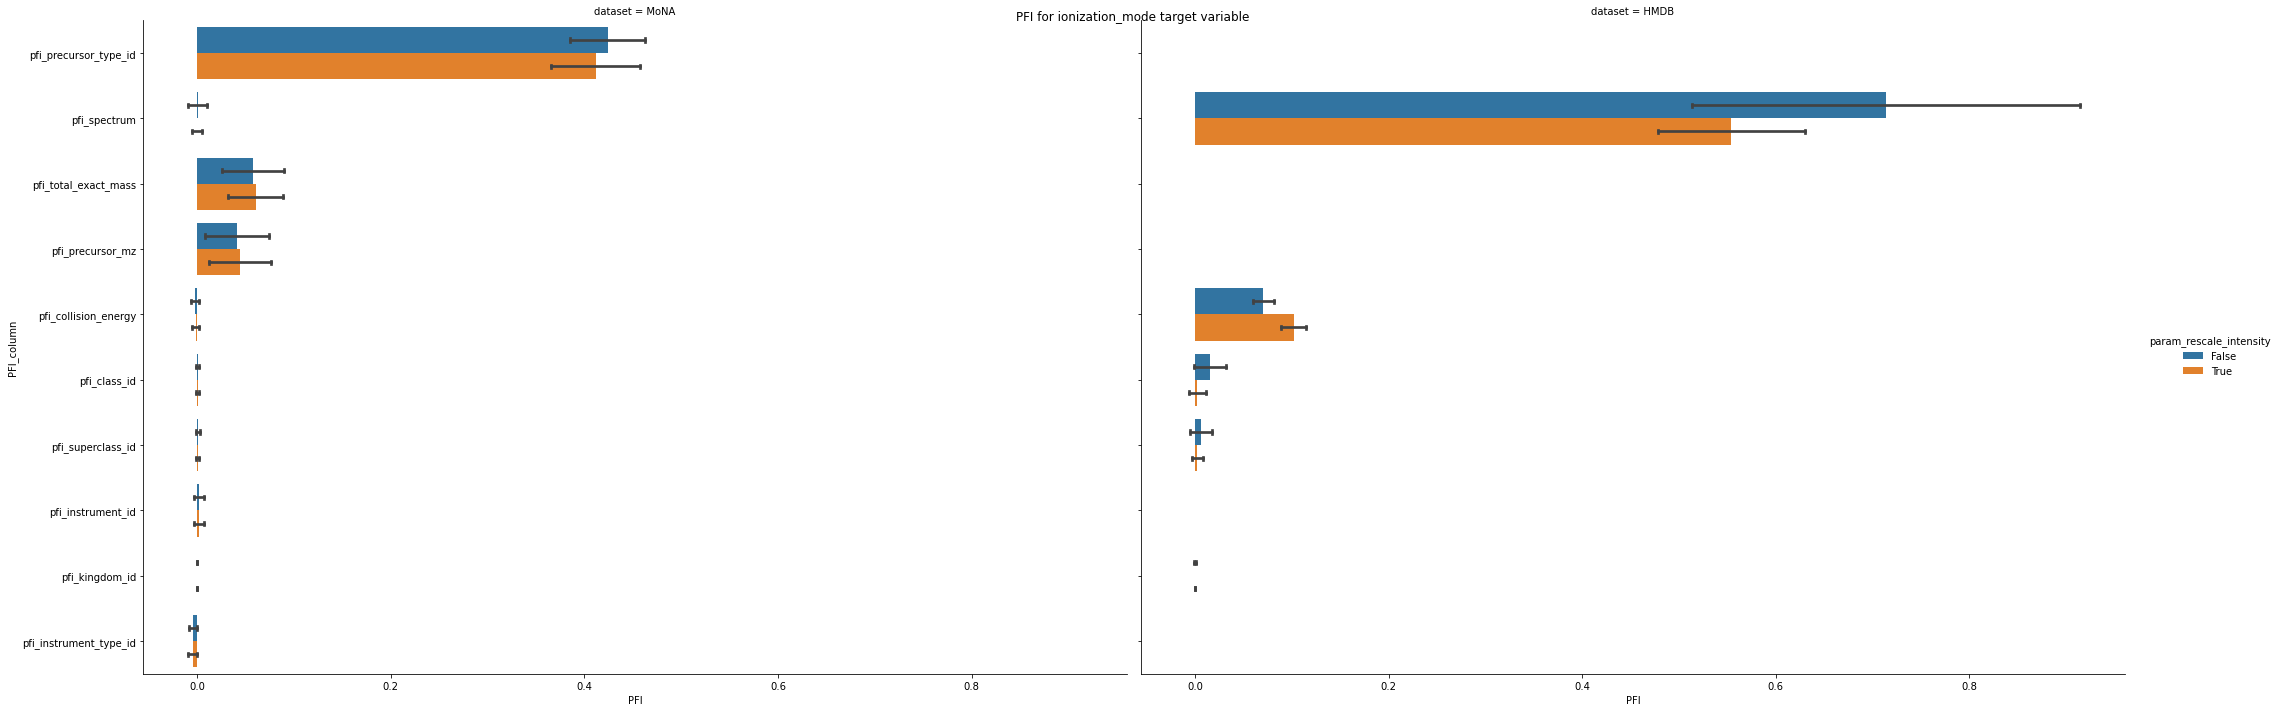

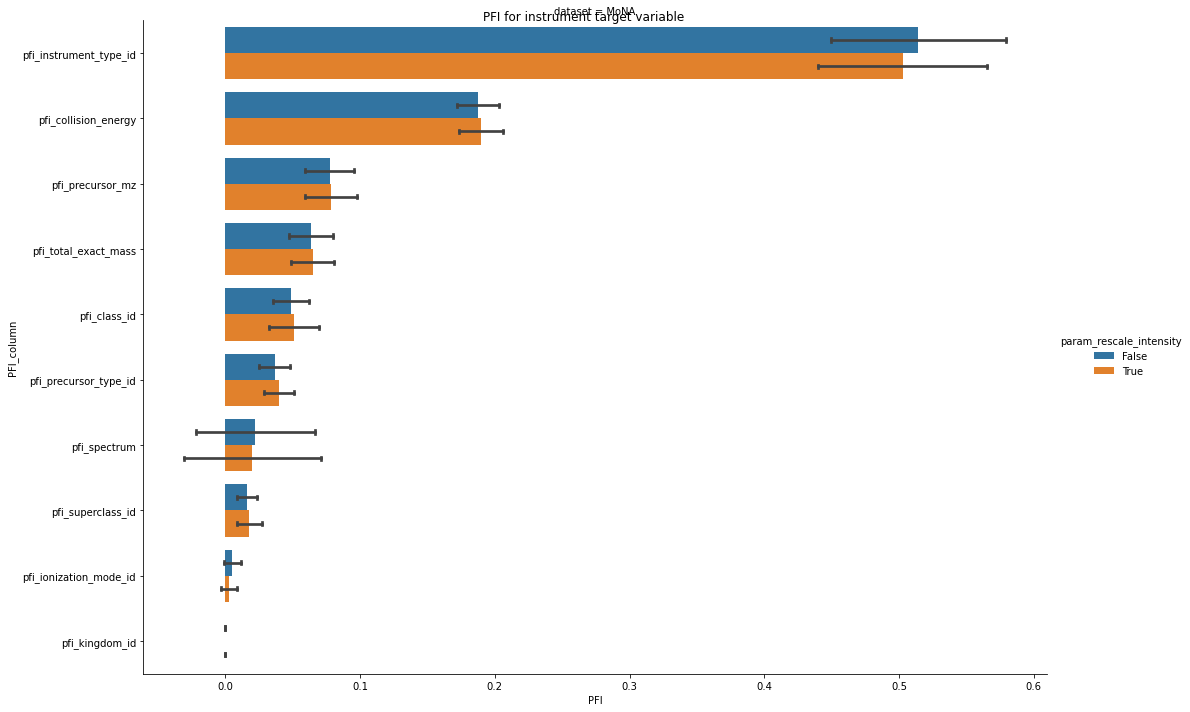

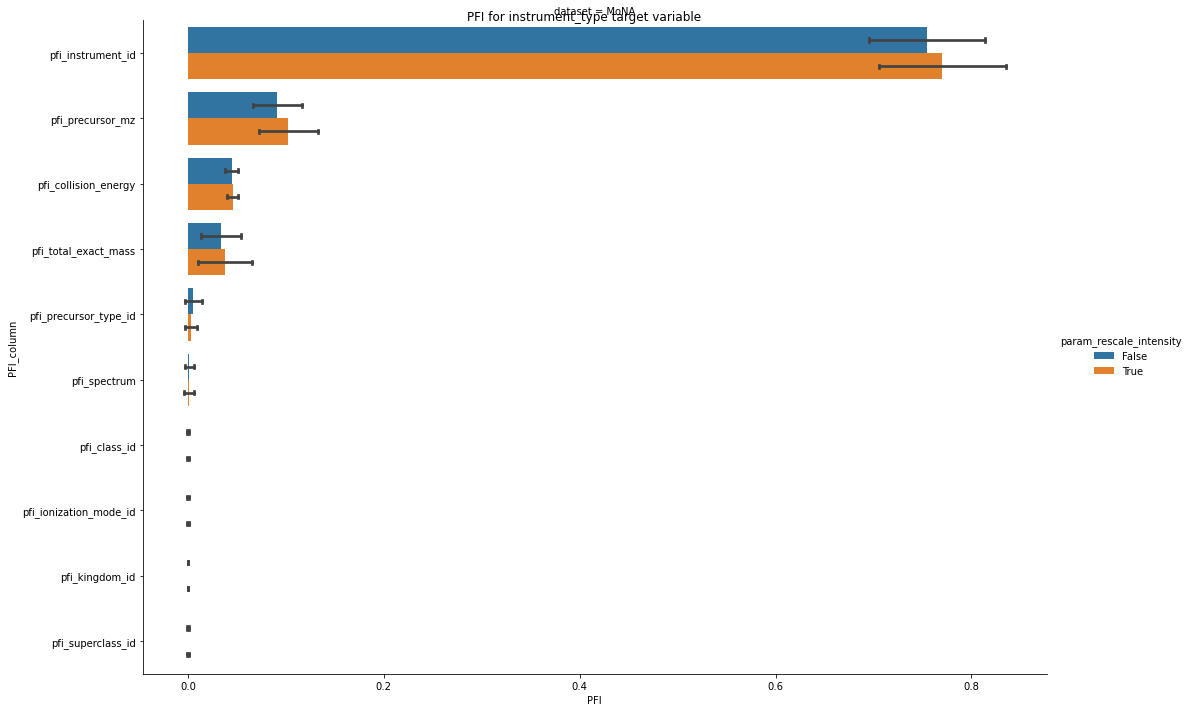

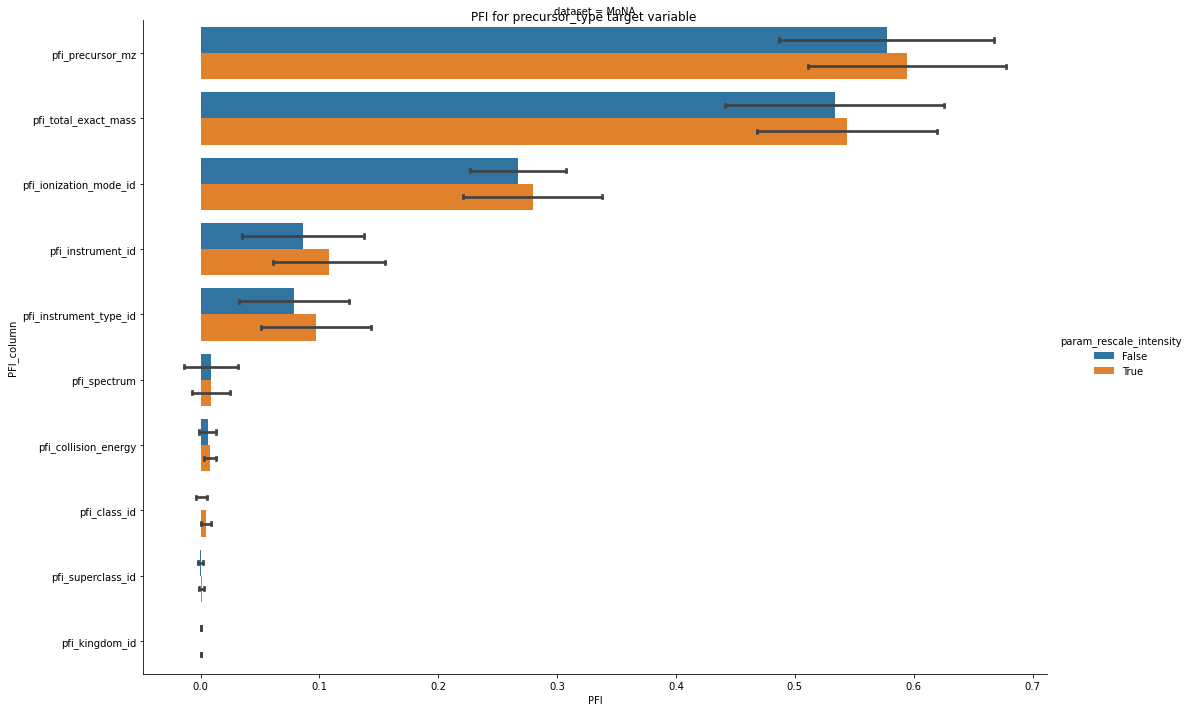

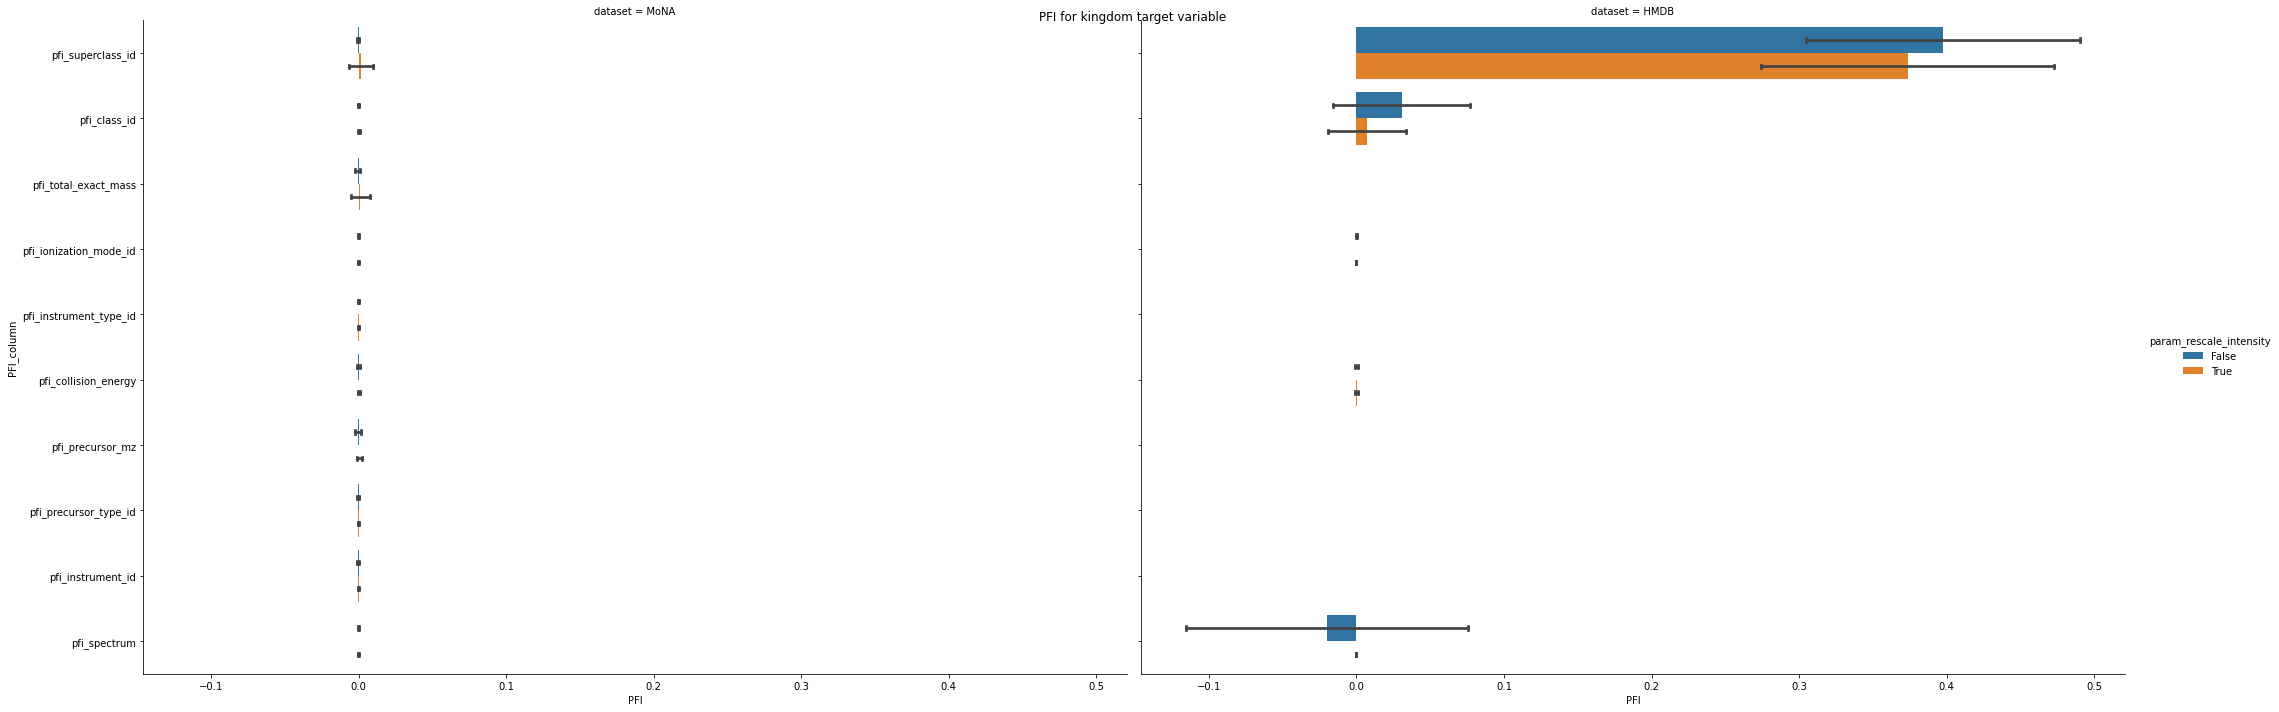

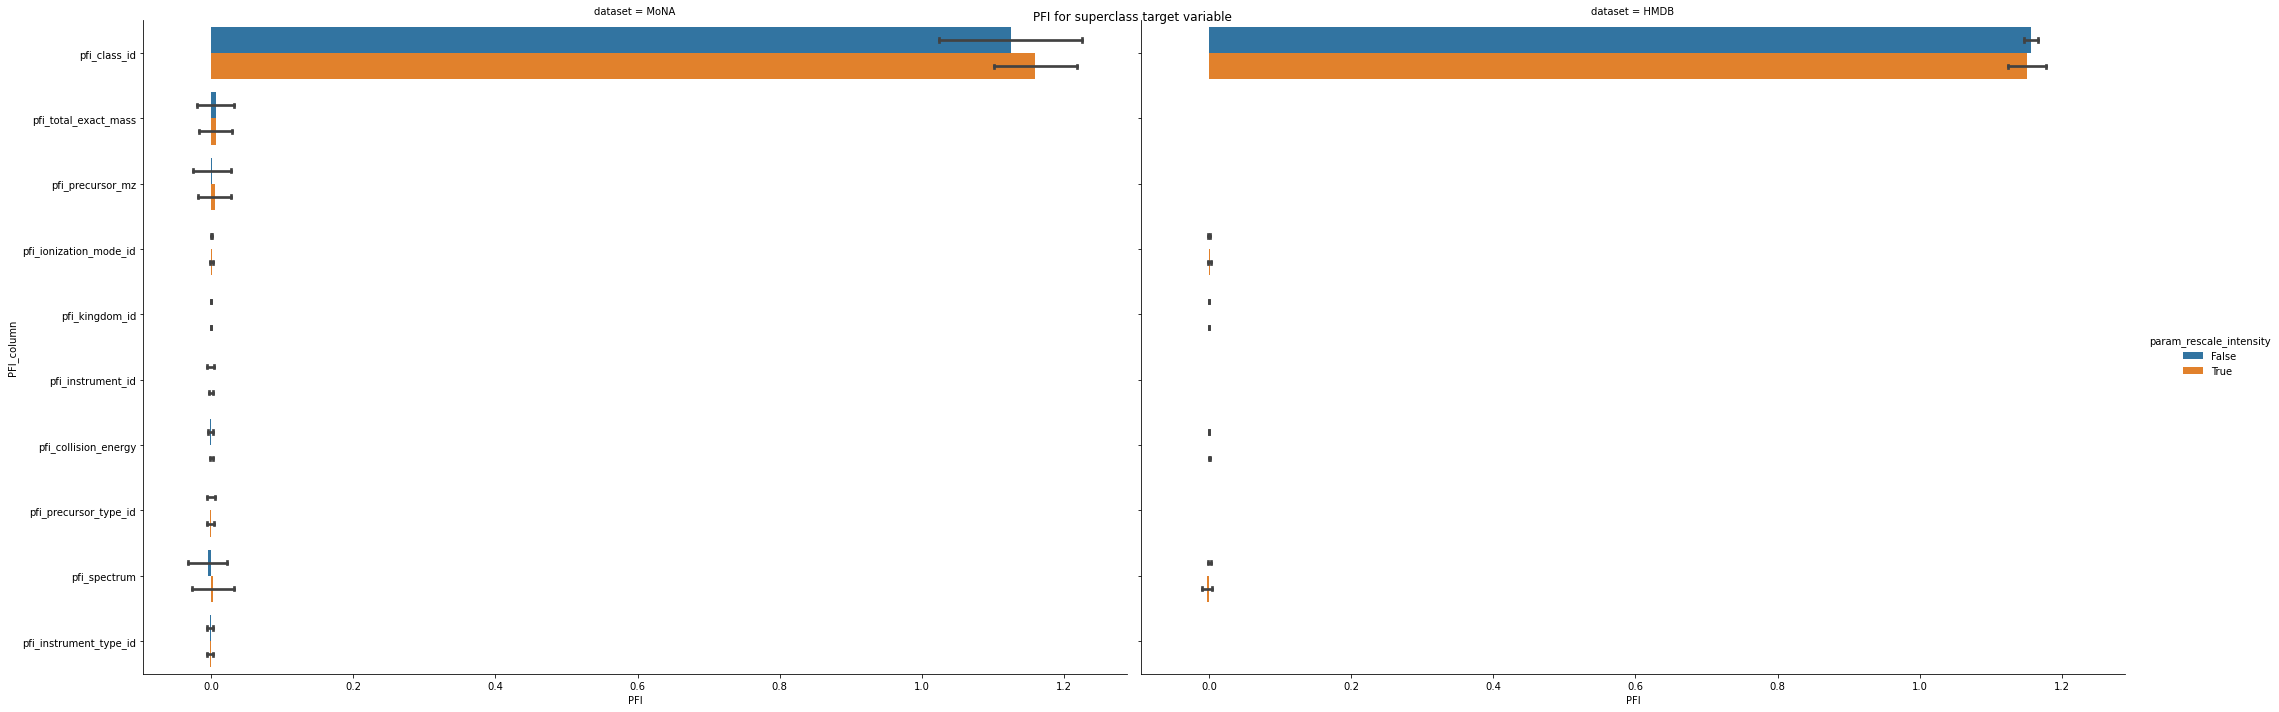

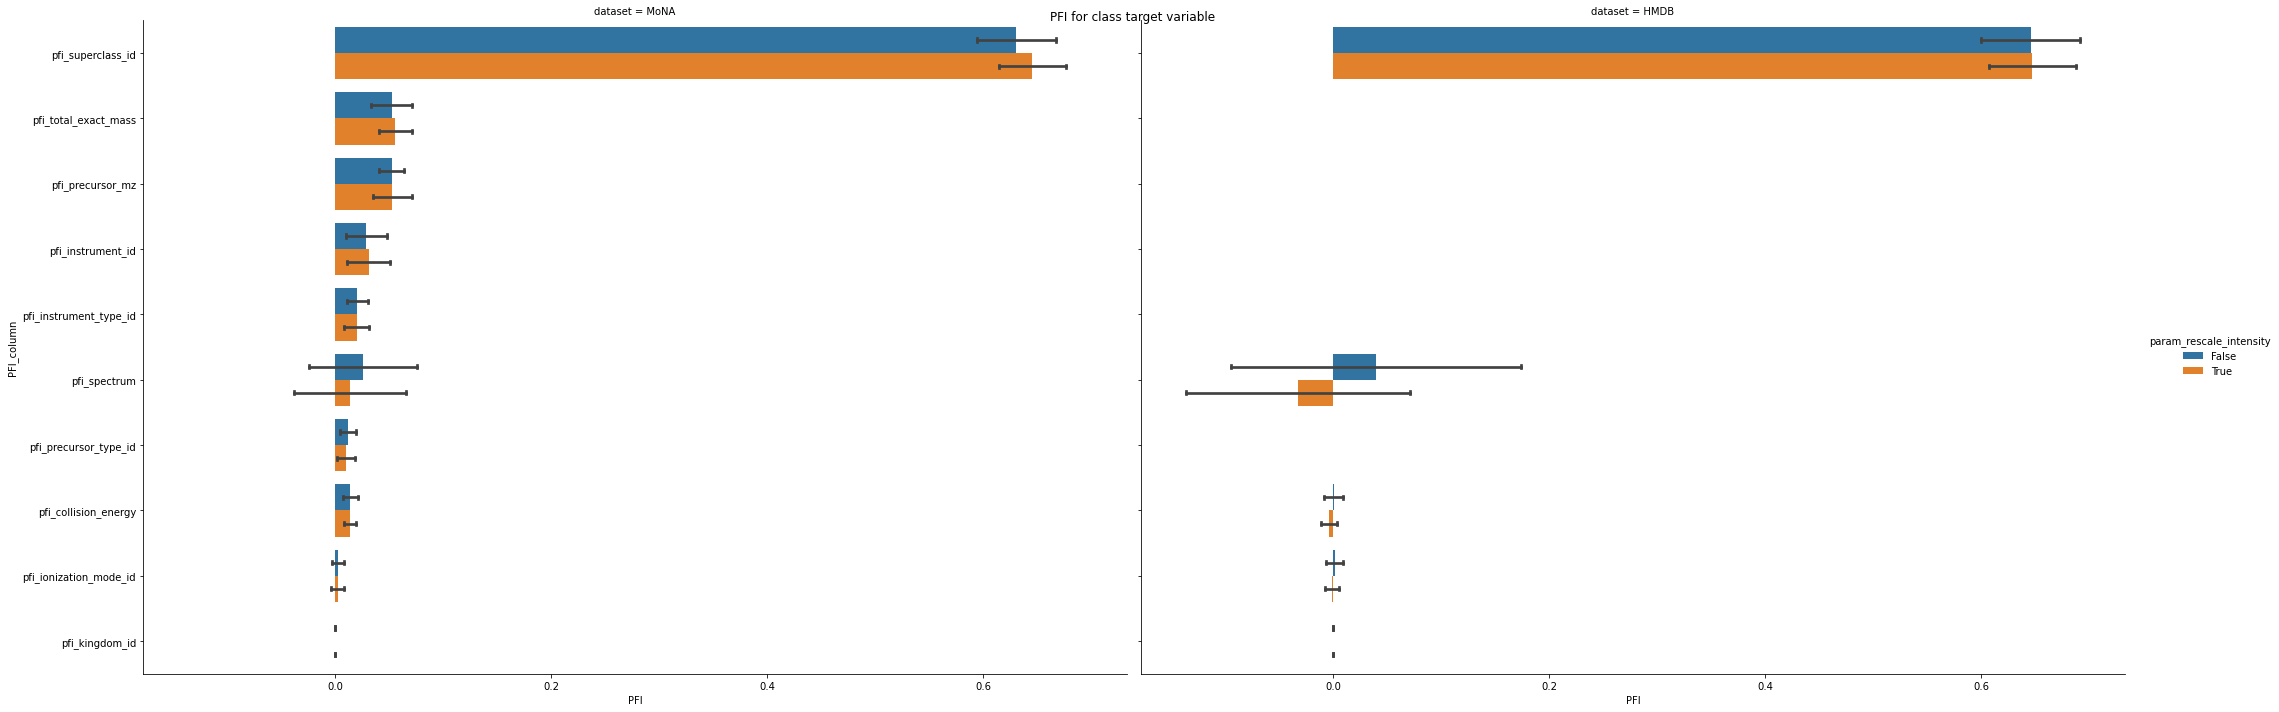

In [64]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_rescale_intensity')